# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings
import warnings
warnings.filterwarnings(action='ignore')

In [9]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [12]:
# Try loading one file

df = pd.read_parquet('../../Datasets and Dictionary/trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [13]:
import os

# Select the folder having data files
os.chdir('../../Datasets and Dictionary/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

file_list

['2023-12.parquet',
 '2023-6.parquet',
 '2023-7.parquet',
 '2023-5.parquet',
 '2023-11.parquet',
 '2023-10.parquet',
 '2023-4.parquet',
 '2023-1.parquet',
 '2023-8.parquet',
 '2023-9.parquet',
 '2023-2.parquet',
 '2023-3.parquet']

In [14]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('../../Datasets and Dictionary/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

         # Reading the current file
        month_df = pd.read_parquet(file_path)

        month_df['date'] = month_df['tpep_pickup_datetime'].dt.date
        month_df['hour'] = month_df['tpep_pickup_datetime'].dt.hour

        month_sampled = pd.DataFrame()

        unique_dates = month_df['date'].unique()

        # Loop through dates and then loop through every hour of each date
        for date in unique_dates:
            date_data = month_df[month_df['date'] == date]
            
            #Iterate through each hour of the selected date
            for hour in range(24):
                hour_data = date_data[date_data['hour'] == hour]
                
                if not hour_data.empty:
                    # Sample 5% of the hourly data randomly
                    sample = hour_data.sample(frac=0.05, random_state=42)
                    month_sampled = pd.concat([month_sampled, sample])
        
        df = pd.concat([df, month_sampled])
        
        print(f"Processed {file_name}")
        
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

Processed 2023-12.parquet
Processed 2023-6.parquet
Processed 2023-7.parquet
Processed 2023-5.parquet
Processed 2023-11.parquet
Processed 2023-10.parquet
Processed 2023-4.parquet
Processed 2023-1.parquet
Processed 2023-8.parquet
Processed 2023-9.parquet
Processed 2023-2.parquet
Processed 2023-3.parquet


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [15]:
# Store the df in csv/parquet
df.to_csv('2023_sampled.csv', index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [16]:
# Load the new data file

df = pd.read_csv('2023_sampled.csv')

In [17]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
1         2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
2         2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
3         2  2023-12-01 00:00:50   2023-12-01 00:14:37              NaN   
4         2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.99         1.0                  N           148            50   
1           4.79         NaN                NaN           231            61   
2           1.05         1.0                  N           161           161   
3           2.08         NaN                NaN           137           144   
4           0.40         1.0                  N            68            68   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        5.66           0.0   
1             0  ...      0.5        3.00           0.0   
2             1  ...      0.5        3.14           0.0   
3             0  ...      0.5        0.00           0.0   
4             1  ...      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         33.96                   2.5          0.0   
1                    1.0         29.43                   NaN          NaN   
2                    1.0         18.84                   2.5          0.0   
3                    1.0         21.22                   NaN          NaN   
4                    1.0         10.10                   2.5          0.0   

         date  hour airport_fee  
0  2023-12-01     0         NaN  
1  2023-12-01     0         NaN  
2  2023-12-01     0         NaN  
3  2023-12-01     0         NaN  
4  2023-12-01     0         NaN  

[5 rows x 22 columns]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  Airport_fee            float64
 19  date                   object 
 20  hour                   int64  
 21  airport_fee            float64
dtypes: float64(13), in

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [19]:
# Fix the index and drop any columns that are not needed

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Drop redundant columns
columns_to_drop = ['date', 'hour']
df = df.drop(columns=columns_to_drop)

df = df.reset_index(drop=True)

In [20]:
df.isnull().sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count            64874
trip_distance                  0
RatecodeID                 64874
store_and_fwd_flag         64874
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge       64874
Airport_fee               213357
airport_fee              1747917
dtype: int64

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [21]:
# Combine the two airport fee columns
df['airport_fee'] = df['airport_fee'].fillna(df['Airport_fee'])

df = df.drop('Airport_fee', axis=1)

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [24]:
# check where values of fare amount are negative
monetary_columns = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']

df['fare_amount'].lt(0).sum()


0

Did you notice something different in the `RatecodeID` column for above records?

In [25]:
# Analyse RatecodeID for the negative fare amounts

df[df['fare_amount'] < 0]['RatecodeID'].value_counts()

Series([], Name: count, dtype: int64)

In [26]:
# Find which columns have negative values
monetary_columns = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']

df[monetary_columns].lt(0).sum()

fare_amount               0
extra                     3
mta_tax                  73
tip_amount                0
tolls_amount              0
improvement_surcharge    78
total_amount             78
congestion_surcharge     56
airport_fee              15
dtype: int64

In [27]:
# fix these negative values
for col in monetary_columns:
    negative_count = (df[col] < 0).sum()
    percent_negative = (negative_count / len(df)) * 100
    print(f"{col}: {negative_count} negative values ({percent_negative:.4f}%)")

fare_amount: 0 negative values (0.0000%)
extra: 3 negative values (0.0002%)
mta_tax: 73 negative values (0.0038%)
tip_amount: 0 negative values (0.0000%)
tolls_amount: 0 negative values (0.0000%)
improvement_surcharge: 78 negative values (0.0041%)
total_amount: 78 negative values (0.0041%)
congestion_surcharge: 56 negative values (0.0030%)
airport_fee: 15 negative values (0.0008%)


In [28]:
for col in monetary_columns:
    median_value = df[df[col]>=0][col].median()
    df[col] = np.where(df[col] < 0, median_value, df[col])

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [35]:
# Find the proportion of missing values in each column
df.isnull().mean()

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.000000
trip_distance            0.000000
RatecodeID               0.034209
store_and_fwd_flag       0.034209
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.034209
airport_fee              0.034209
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [46]:
# Display rows with null values in 'passenger_count'
null_passenger_count = df[df['passenger_count'].isnull()]
print(null_passenger_count)

# Impute NaN values in 'passenger_count'
passenger_count_mode = df['passenger_count'].mode()[0]
df['passenger_count'].fillna(passenger_count_mode, inplace=True)

# Verify if there are any remaining null values in 'passenger_count'
print(df['passenger_count'].isnull().sum())

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []
0


/var/folders/bp/4740kjgn0d9fmql_4l721c9w0000gn/T/ipykernel_11353/3485541680.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['passenger_count'].fillna(passenger_count_mode, inplace=True)


Did you find zeroes in passenger_count? Handle these.

In [37]:
df['passenger_count'] = df['passenger_count'].apply(lambda x: passenger_count_mode if x == 0 else x)

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [44]:
# Fix missing values in 'RatecodeID'
# As RatecodeID is categorical, we can use the mode to fill in the missing values
mode_ratecode = df['RatecodeID'].mode()[0]
df['RatecodeID'].fillna(mode_ratecode, inplace=True)

/var/folders/bp/4740kjgn0d9fmql_4l721c9w0000gn/T/ipykernel_11353/199524727.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RatecodeID'].fillna(mode_ratecode, inplace=True)


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [42]:
# handle null values in congestion_surcharge
# As congestion_surcharge is numeric, we can use the median to fill in the missing values
median_congestion = df['congestion_surcharge'].median()
df['congestion_surcharge'].fillna(median_congestion, inplace=True)



/var/folders/bp/4740kjgn0d9fmql_4l721c9w0000gn/T/ipykernel_11353/532646692.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['congestion_surcharge'].fillna(median_congestion, inplace=True)


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [47]:
# Handle any remaining missing values
df.isnull().sum()


VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
store_and_fwd_flag       64874
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
airport_fee              64874
dtype: int64

In [51]:
# Impute NaN values in store_and_fwd_flag and airport_fee

# As store_and_fwd_flag is categorical, we can use the mode to fill in the missing values
mode_store_and_fwd = df['store_and_fwd_flag'].mode()[0]
df['store_and_fwd_flag'].fillna(mode_store_and_fwd, inplace=True)

# As airport_fee is numeric, we can use the median to fill in the missing values
median_airport_fee = df['airport_fee'].median()
df['airport_fee'].fillna(median_airport_fee, inplace=True)

/var/folders/bp/4740kjgn0d9fmql_4l721c9w0000gn/T/ipykernel_11353/3178457405.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['airport_fee'].fillna(median_airport_fee, inplace=True)


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

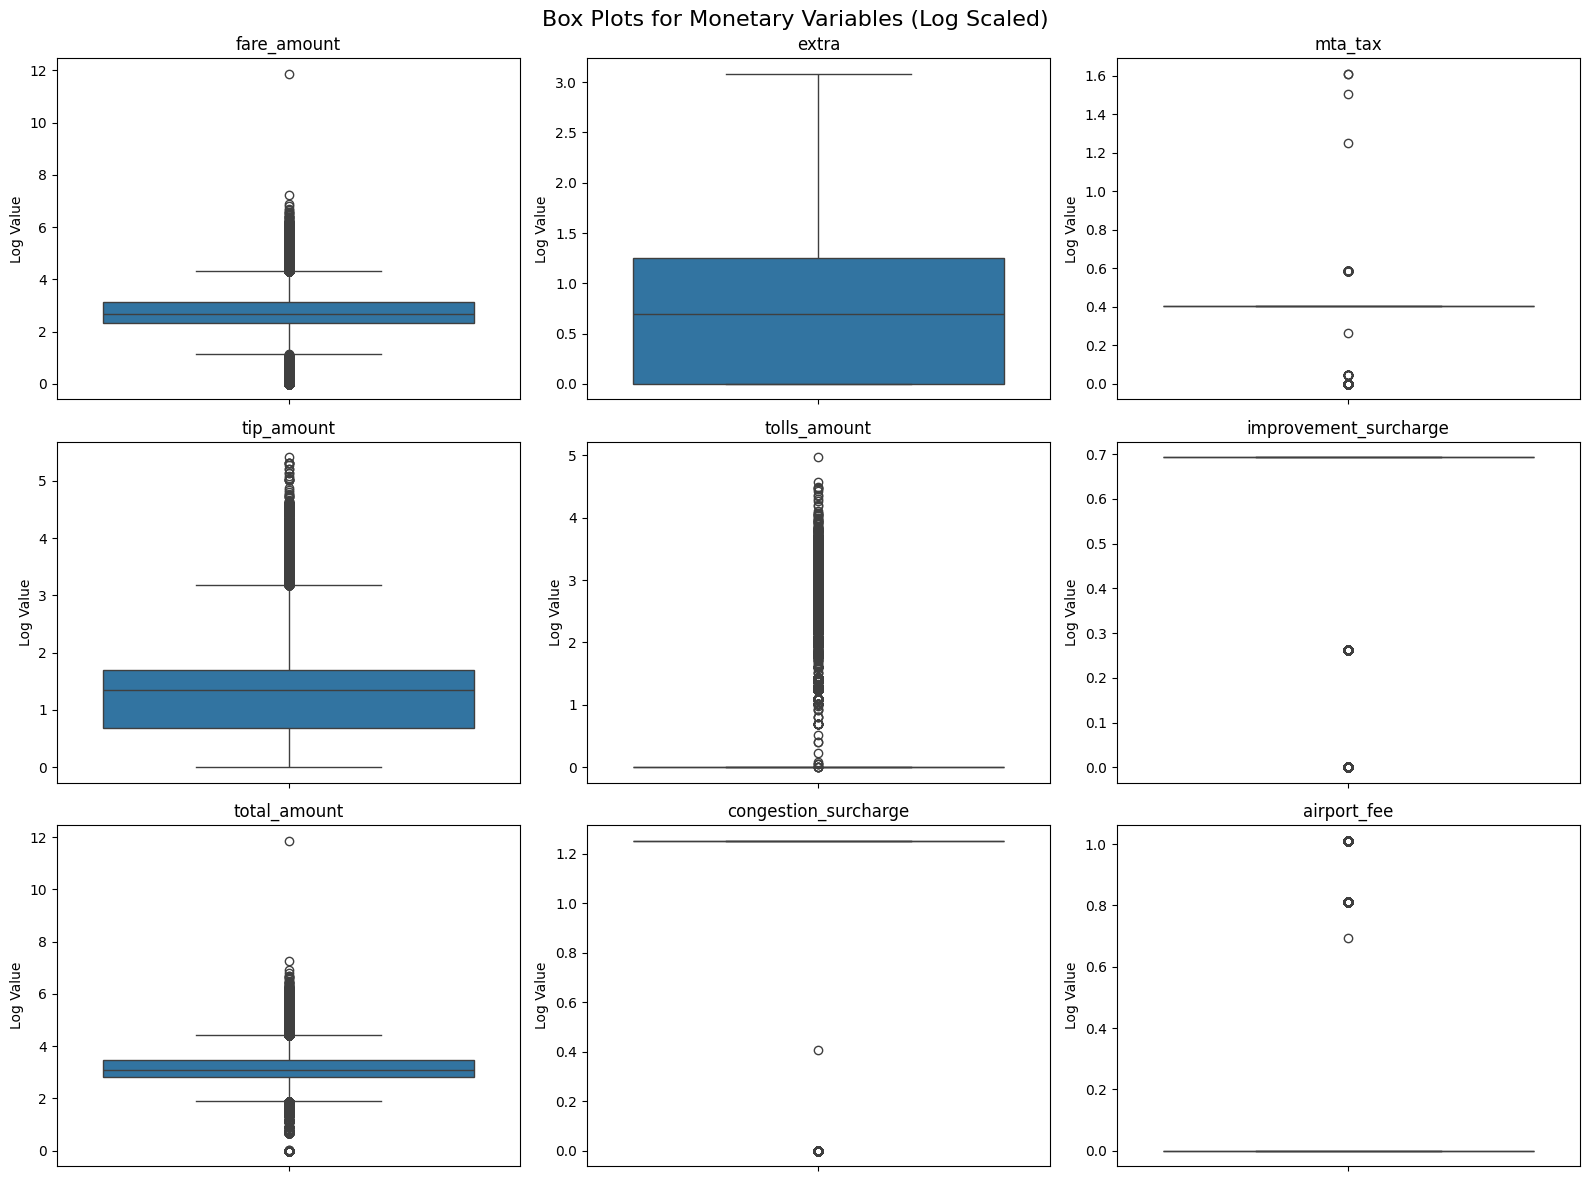

In [52]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
fig.suptitle("Box Plots for Monetary Variables (Log Scaled)", fontsize=16)

for col, ax in zip(monetary_columns, axes.flatten()):
    sns.boxplot(y=np.log1p(df[col]), ax=ax)
    ax.set_title(col)
    ax.set_ylabel('Log Value')

plt.tight_layout()
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [53]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]

In [54]:
# Continue with outlier handling
# Handling outliers for trip_distance == 0 and fare_amount > 300
df = df[~((df['trip_distance'] < 0.01) & (df['fare_amount'] > 300))]

In [ ]:
# Handling outliers for trip_distance = 0 and fare_amount = 0 and pickup and dropoff zones differ
df = df[~((df['trip_distance'] == 0) & 
          (df['fare_amount'] == 0) & 
          (df['PULocationID'] != df['DOLocationID']))]


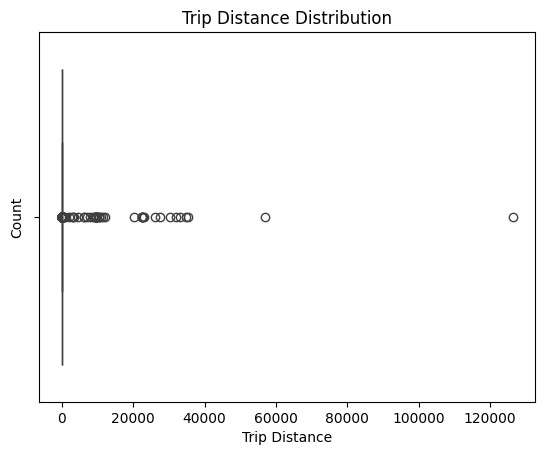

In [56]:
sns.boxplot(x='trip_distance', data=df)
plt.title('Trip Distance Distribution')
plt.xlabel('Trip Distance')
plt.ylabel('Count')
plt.show()

In [57]:
# Remove outliers for trip_distance > 250 miles
df = df[df['trip_distance'] <= 250]

In [58]:
df['payment_type'].value_counts()

payment_type
1    1492301
2     316412
0      64844
4      13673
3       9006
Name: count, dtype: int64

In [59]:
# Remove outliers for payment_type, as payment_type = 0 is not valid
df = df[df['payment_type'] != 0]

In [60]:
# Do any columns need standardising?

q3 = df['fare_amount'].quantile(0.75)
q1 = df['fare_amount'].quantile(0.25)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(lower_bound, upper_bound)

len(df[df['fare_amount']>upper_bound]) # We have many outliers in fare_amount so cannot remove them.

-9.599999999999998 40.8


191511

In [61]:
# Capping the fare_amount at 300 as the maximum value
df['fare_amount'] = np.where(df['fare_amount'] > 300, 300, df['fare_amount'])

In [66]:
columns_to_check = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 
                    'tolls_amount', 'improvement_surcharge', 'total_amount', 
                    'congestion_surcharge', 'airport_fee']

# Creating an empty dictionary to store outliers for each column
outliers = {}

print("Outliers")
# Calculate the IQR and check for outliers
for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {outliers[col].shape[0]}")
    

Outliers
fare_amount: 191511
extra: 33749
mta_tax: 17094
tip_amount: 141637
tolls_amount: 148643
improvement_surcharge: 1481
total_amount: 215113
congestion_surcharge: 140791
airport_fee: 160935


In [ ]:
# We have many outliers according to IQR in above columns so cannot remove them.

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [67]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: DateTime
* `tpep_dropoff_datetime`: DateTime
* `passenger_count`: Categorical (We can group the trips based on the passenger_count)
* `trip_distance`: Numeric
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Categorical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

The given monetary parameters are Numerical.

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

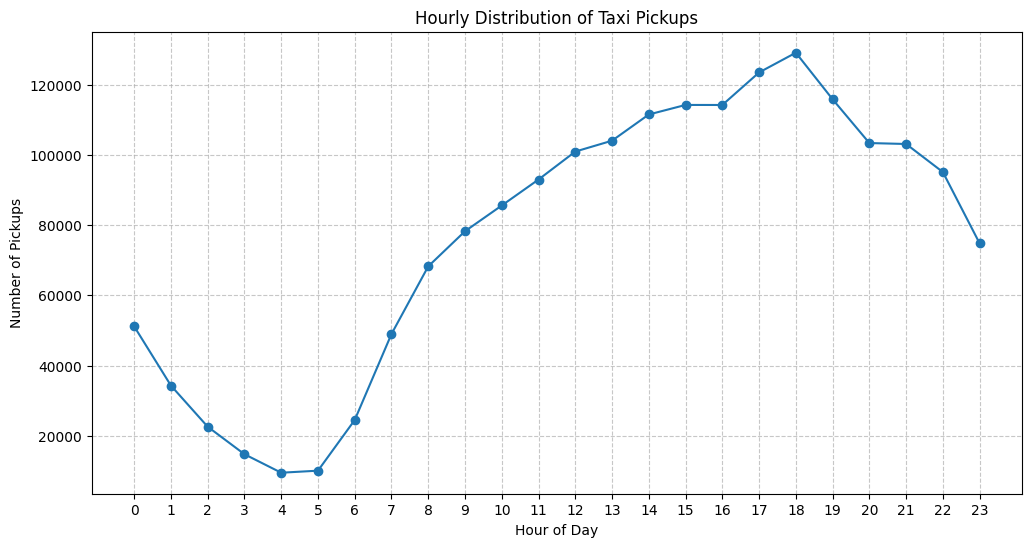

In [68]:
# Find and show the hourly trends in taxi pickups

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

hourly_pickups = df.groupby('pickup_hour').size()

plt.figure(figsize=(12, 6))
plt.plot(hourly_pickups.index, hourly_pickups.values, marker='o')
plt.title('Hourly Distribution of Taxi Pickups')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

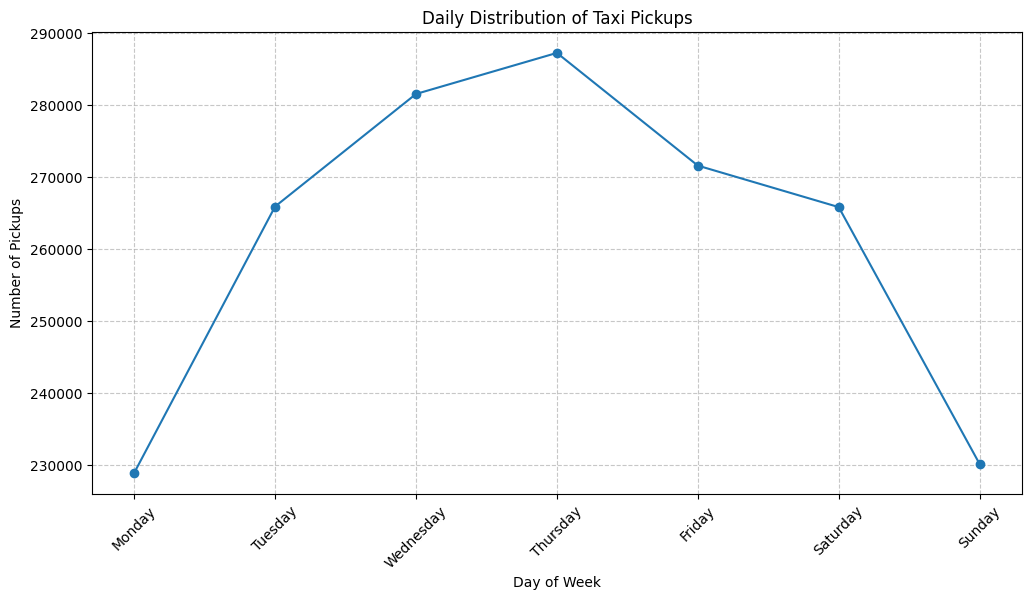

In [69]:
# Find and show the daily trends in taxi pickups (days of the week)

df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()
daily_pickups = df.groupby('pickup_day').size()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_pickups = daily_pickups.reindex(days_order)

plt.figure(figsize=(12, 6))
plt.plot(daily_pickups.index, daily_pickups.values, marker='o')
plt.title('Daily Distribution of Taxi Pickups')
plt.xlabel('Day of Week')
plt.ylabel('Number of Pickups')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

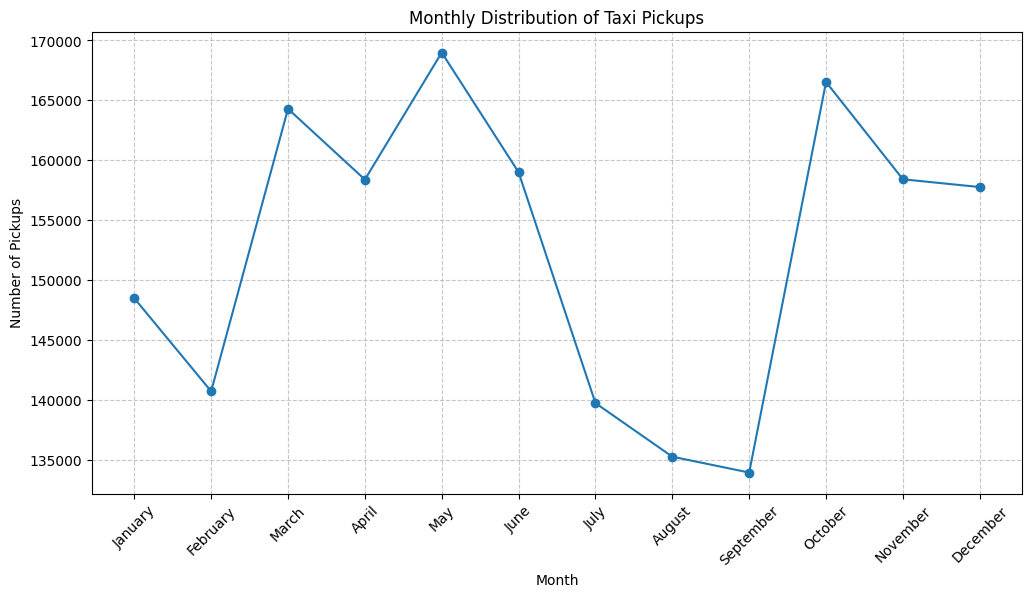

In [71]:
# Show the monthly trends in pickups
df['pickup_month'] = df['tpep_pickup_datetime'].dt.strftime('%B')
monthly_pickups = df.groupby('pickup_month').size()

months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_pickups = monthly_pickups.reindex(months_order)

plt.figure(figsize=(12, 6))
plt.plot(monthly_pickups.index, monthly_pickups.values, marker='o')
plt.title('Monthly Distribution of Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [72]:
# Analyse the above parameters

financial_parameters = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for col in financial_parameters:
    neg_count = (df[col] < 0).sum()
    zero_count = (df[col] == 0).sum()
    print(f"{col}: {neg_count} negative values, {zero_count} zero values")

fare_amount: 0 negative values, 575 zero values
tip_amount: 0 negative values, 410235 zero values
total_amount: 0 negative values, 255 zero values
trip_distance: 0 negative values, 22928 zero values


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

Ans:
- fare_amount: If fare_amount is 0, it is likely that the trip was not completed or was cancelled. And we have only 575 such records so we can remove them.
- tip_amount: If tip_amount is 0, it means no tip was given. This is common and can be ignored.
- total_amount: If total_amount is 0, it means no payment was made. This is likely an error and should be removed.
- trip_distance: If trip_distance is 0, it means trip pickup and drop can be in same zone or not completed. This is common and can be ignored.

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [73]:
# Create a df with non zero entries for the selected parameters.
selected_parameters = ['fare_amount', 'total_amount']
filtered_df = df[(df[selected_parameters] > 0).all(axis=1)]


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

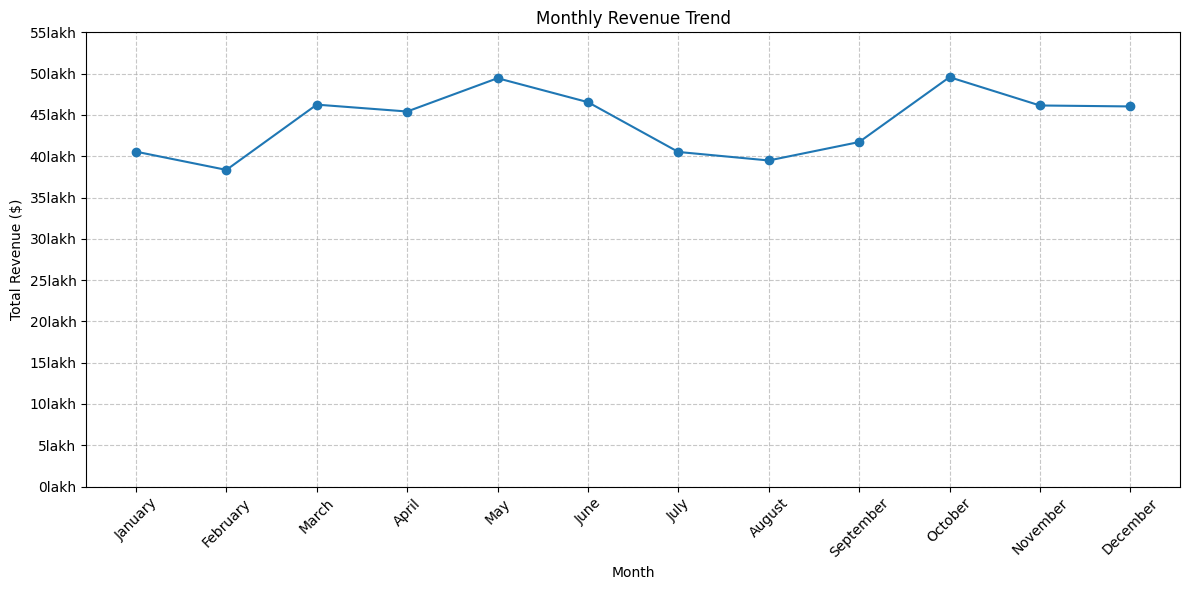

In [75]:
# Group data by month and analyse monthly revenue
monthly_revenue = filtered_df.groupby('pickup_month')['total_amount'].sum()

months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_revenue = monthly_revenue.reindex(months_order)

plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
ticks = np.arange(0,6000000,500000)
labels=["{}lakh".format(i//100000) for i in ticks]
plt.yticks(ticks,labels)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [76]:
# Calculate proportion of each quarter
filtered_df['quarter'] = filtered_df['tpep_pickup_datetime'].dt.quarter

quarter_counts = filtered_df['quarter'].value_counts()

quarter_proportions = quarter_counts / quarter_counts.sum()

print(quarter_proportions)

quarter
2    0.265557
4    0.263564
1    0.247599
3    0.223280
Name: count, dtype: float64


/var/folders/bp/4740kjgn0d9fmql_4l721c9w0000gn/T/ipykernel_11353/2858922912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['quarter'] = filtered_df['tpep_pickup_datetime'].dt.quarter


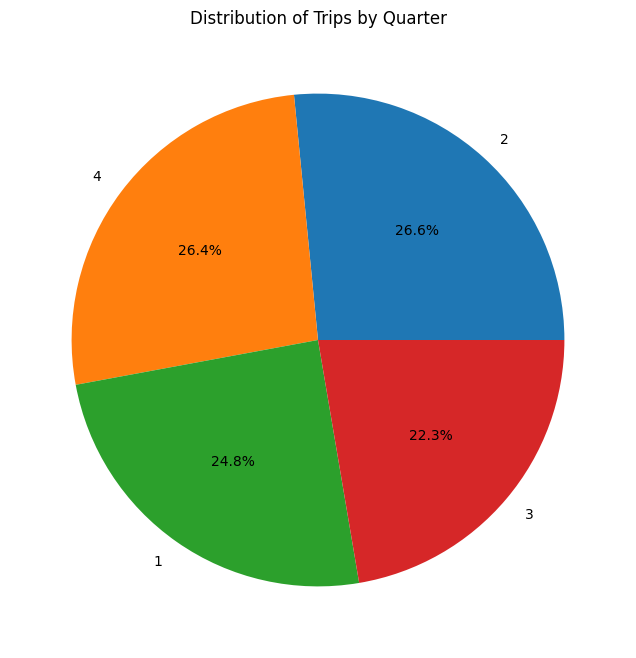

In [77]:
#Pie chart is recommanded to show the proportion in a best way
plt.figure(figsize=(10, 8))
plt.pie(quarter_proportions, labels=quarter_proportions.index, autopct='%1.1f%%')
plt.title('Distribution of Trips by Quarter')
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

Correlation between trip distance and fare amount: 0.95


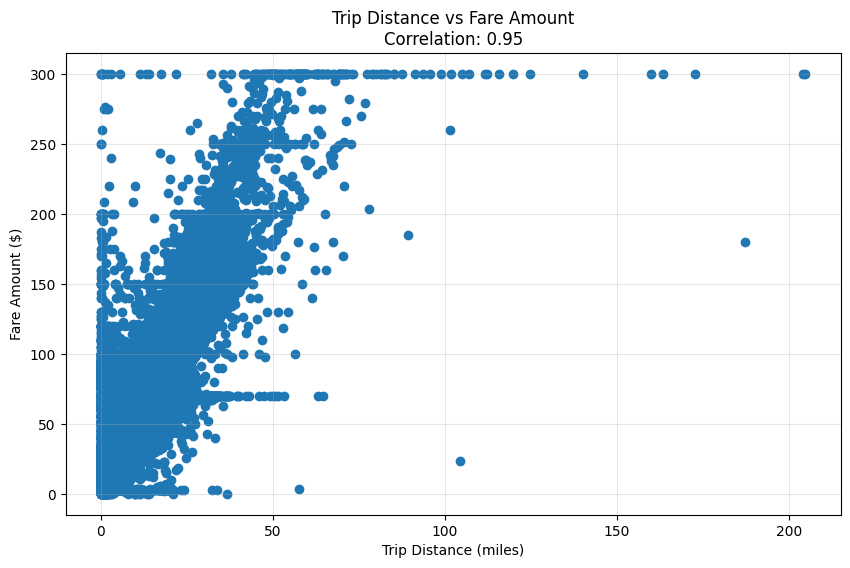

In [78]:
# Show how trip fare is affected by distance

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df[filtered_df['trip_distance'] > 0]['trip_distance'], 
           filtered_df[filtered_df['trip_distance'] > 0]['fare_amount'])
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')

correlation = filtered_df[filtered_df['trip_distance'] > 0]['trip_distance'].corr(filtered_df[filtered_df['trip_distance'] > 0]['fare_amount'])
print(f"Correlation between trip distance and fare amount: {correlation:.2f}")
plt.title(f'Trip Distance vs Fare Amount\nCorrelation: {correlation:.2f}')

plt.grid(True, alpha=0.3)
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

/var/folders/bp/4740kjgn0d9fmql_4l721c9w0000gn/T/ipykernel_11353/2178230828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['trip_duration'] = (filtered_df['tpep_dropoff_datetime'] - filtered_df['tpep_pickup_datetime']).dt.total_seconds() / 60


Correlation between trip duration and fare amount: 0.26


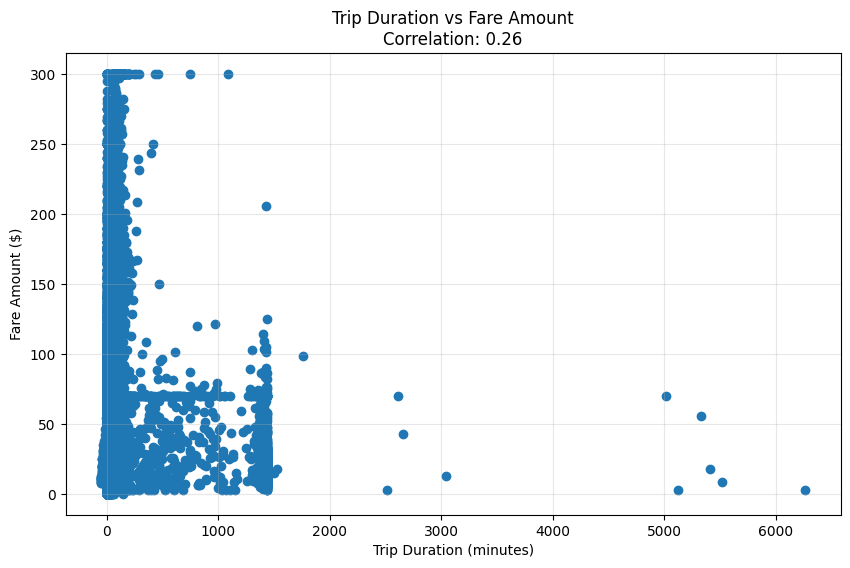

In [79]:
# Show relationship between fare and trip duration
filtered_df['trip_duration'] = (filtered_df['tpep_dropoff_datetime'] - filtered_df['tpep_pickup_datetime']).dt.total_seconds() / 60

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['trip_duration'], filtered_df['fare_amount'])
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')

correlation = filtered_df['trip_duration'].corr(filtered_df['fare_amount'])
print(f"Correlation between trip duration and fare amount: {correlation:.2f}")
plt.title(f'Trip Duration vs Fare Amount\nCorrelation: {correlation:.2f}')

plt.grid(True, alpha=0.3)
plt.show()


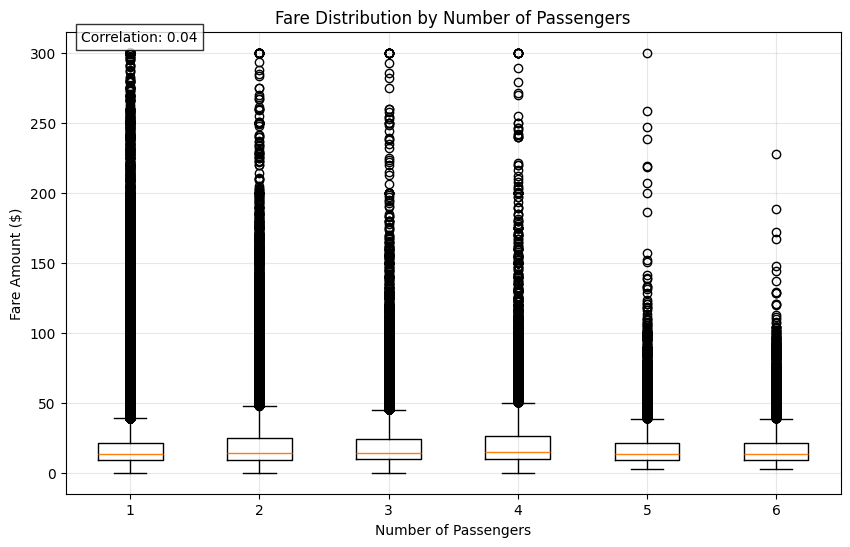

In [80]:
# Show relationship between fare and number of passengers

plt.figure(figsize=(10, 6))
plt.boxplot([filtered_df[filtered_df['passenger_count'] == i]['fare_amount'] for i in range(1, 7)])
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount ($)')
plt.title('Fare Distribution by Number of Passengers')
plt.xticks(range(1, 7))
plt.grid(True, alpha=0.3)

# Calculate and display correlation
correlation = filtered_df['passenger_count'].corr(filtered_df['fare_amount'])
plt.text(0.02, 0.98, f'Correlation: {correlation:.2f}', 
         transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))

plt.show()

In [81]:
corr = filtered_df['fare_amount'].corr(filtered_df['passenger_count'])
print(f"Correlation between fare amount and passenger count: {corr:.2f}")

Correlation between fare amount and passenger count: 0.04


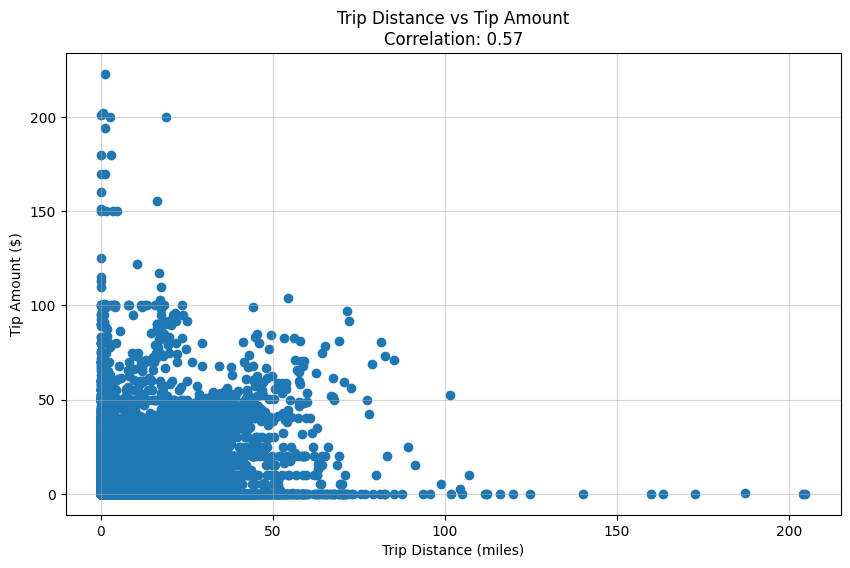

In [82]:
# Show relationship between tip and trip distance

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['trip_distance'], filtered_df['tip_amount'])
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')

# Calculate and display correlation
correlation = filtered_df['trip_distance'].corr(filtered_df['tip_amount'])
plt.title(f'Trip Distance vs Tip Amount\nCorrelation: {correlation:.2f}')

plt.grid(True, alpha=0.5)
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

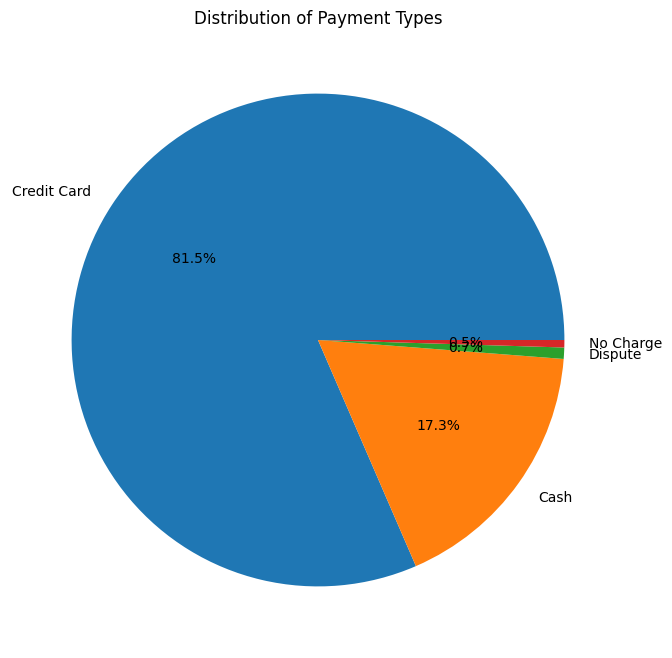

Credit Card: 1,492,181 trips
Cash: 316,183 trips
Dispute: 13,568 trips
No Charge: 8,885 trips


In [83]:
# Analyse the distribution of different payment types (payment_type).
payment_type_counts = filtered_df['payment_type'].value_counts()

payment_labels = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}

plt.figure(figsize=(10, 8))
plt.pie(payment_type_counts, labels=[payment_labels[i] for i in payment_type_counts.index], autopct='%1.1f%%')
plt.title('Distribution of Payment Types')
plt.show()

for payment_type in payment_type_counts.index:
    print(f"{payment_labels[payment_type]}: {payment_type_counts[payment_type]:,} trips")



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



In [84]:
payment_type_counts

payment_type
1    1492181
2     316183
4      13568
3       8885
Name: count, dtype: int64

##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
!pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 13.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.3 MB/s eta 0:00:00


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [ ]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('../taxi_zones/taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

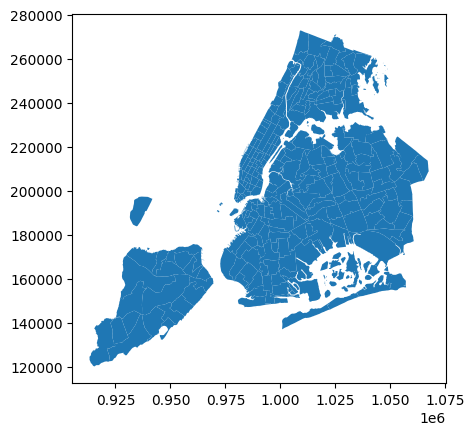

In [ ]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [89]:
# Merge zones and trip records using locationID and PULocationID

filtered_df_with_zones = filtered_df.merge(zones, 
                        left_on='PULocationID', 
                        right_on='LocationID', 
                        how='left')

filtered_df_with_zones = filtered_df_with_zones.rename(columns={'zone': 'pickup_zone',
                                            'borough': 'pickup_borough'})

filtered_df_with_zones = filtered_df_with_zones.drop('LocationID', axis=1)

In [90]:
filtered_df_with_zones.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
1         2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
2         2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   
3         2  2023-12-01 00:57:08   2023-12-01 01:05:49              1.0   
4         2  2023-12-01 00:46:28   2023-12-01 00:59:29              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.99         1.0                  N           148            50   
1           1.05         1.0                  N           161           161   
2           0.40         1.0                  N            68            68   
3           1.66         1.0                  N           114           186   
4           2.45         1.0                  N           164           232   

   payment_type  ...  pickup_day  pickup_month  quarter  trip_duration  \
0             1  ...      Friday      December        4      22.350000   
1             1  ...      Friday      December        4      10.633333   
2             1  ...      Friday      December        4       3.166667   
3             1  ...      Friday      December        4       8.683333   
4             1  ...      Friday      December        4      13.016667   

   OBJECTID  Shape_Leng  Shape_Area              pickup_zone  pickup_borough  \
0     148.0    0.039131    0.000070          Lower East Side       Manhattan   
1     161.0    0.035804    0.000072           Midtown Center       Manhattan   
2      68.0    0.049337    0.000111             East Chelsea       Manhattan   
3     114.0    0.031727    0.000047  Greenwich Village South       Manhattan   
4     164.0    0.035772    0.000056            Midtown South       Manhattan   

                                            geometry  
0  POLYGON ((988552.836 201677.665, 988387.669 20...  
1  POLYGON ((991081.026 214453.698, 990952.644 21...  
2  POLYGON ((983690.405 209040.369, 983550.612 20...  
3  POLYGON ((986306.712 203122.786, 986300.242 20...  
4  POLYGON ((988787.425 210315.593, 988662.868 21...  

[5 rows x 30 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [92]:
# Group data by location and calculate the number of trips

location_trips = filtered_df_with_zones.groupby('PULocationID').size()

print(location_trips)

PULocationID
1        213
2          2
3         40
4       1861
5         13
       ...  
261     9604
262    23616
263    34867
264    17499
265      978
Length: 257, dtype: int64


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [94]:
# Merge trip counts back to the zones GeoDataFrame
zones['trip_count'] = zones['LocationID'].map(location_trips)

zones['trip_count'] = zones['trip_count'].fillna(0)



The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

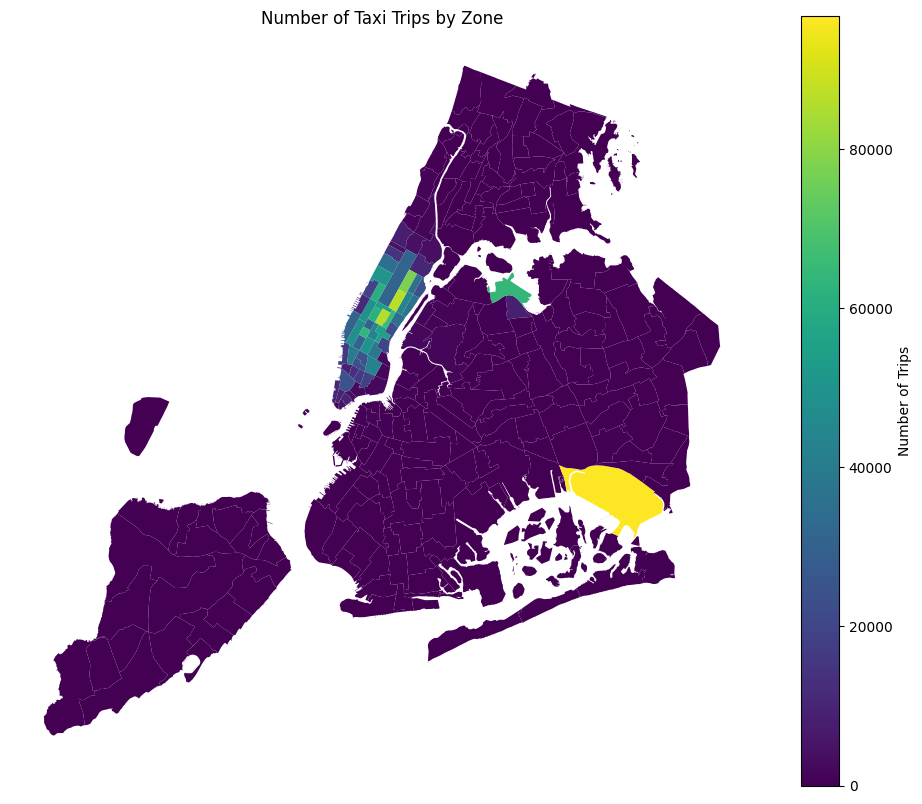

In [95]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it

zones.plot(column='trip_count', 
          figsize=fig,
          ax=ax,
          legend=True,
          legend_kwds={'label': 'Number of Trips'},
          missing_kwds={'color': 'lightgrey'})
plt.title('Number of Taxi Trips by Zone')
plt.axis('off')
plt.show()


In [96]:
# can you try displaying the zones DF sorted by the number of trips?

zones.sort_values('trip_count', ascending=False).head(10)

OBJECTID  Shape_Leng  Shape_Area                          zone  \
131       132    0.245479    0.002038                   JFK Airport   
236       237    0.042213    0.000096         Upper East Side South   
160       161    0.035804    0.000072                Midtown Center   
235       236    0.044252    0.000103         Upper East Side North   
161       162    0.035270    0.000048                  Midtown East   
137       138    0.107467    0.000537             LaGuardia Airport   
185       186    0.024696    0.000037  Penn Station/Madison Sq West   
229       230    0.031028    0.000056     Times Sq/Theatre District   
141       142    0.038176    0.000076           Lincoln Square East   
169       170    0.045769    0.000074                   Murray Hill   

     LocationID    borough                                           geometry  \
131         132     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
236         237  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
160         161  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
235         236  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
161         162  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   
137         138     Queens  MULTIPOLYGON (((1019904.219 225677.983, 102031...   
185         186  Manhattan  POLYGON ((986752.603 210853.699, 986627.863 21...   
229         230  Manhattan  POLYGON ((988786.877 214532.094, 988650.277 21...   
141         142  Manhattan  POLYGON ((989380.305 218980.247, 989359.803 21...   
169         170  Manhattan  POLYGON ((991999.299 210994.739, 991972.635 21...   

     trip_count  
131     96755.0  
236     86895.0  
160     85930.0  
235     77507.0  
161     65629.0  
137     64156.0  
185     63464.0  
229     61305.0  
141     60878.0  
169     54481.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
# Find routes which have the slowest speeds at different times of the day
# Calculate speed (miles per minute) for each trip
filtered_df_with_zones['speed'] = filtered_df_with_zones['trip_distance'] / filtered_df_with_zones['trip_duration']

# Group by hour and route (PULocationID and DOLocationID) to get average speeds
route_speeds = (filtered_df_with_zones.groupby(['pickup_hour', 'PULocationID', 'DOLocationID'])
               .agg({
                   'speed': 'mean',
                   'trip_distance': 'mean',
                   'trip_duration': 'mean',
                   'pickup_zone': 'first'
               })
               .reset_index())

# For each hour, find the 5 slowest routes
slowest_routes_df = pd.DataFrame()
for hour in range(24):
    hour_data = route_speeds[route_speeds['pickup_hour'] == hour]
    # Get 5 slowest routes with non-zero speed
    hour_routes = hour_data[hour_data['speed'] > 0].nsmallest(5, 'speed')
    slowest_routes_df = pd.concat([slowest_routes_df, hour_routes])

# Sort by speed to show overall slowest routes
slowest_routes_df = slowest_routes_df.sort_values('speed')

# Display the slowest routes
slowest_routes_df = slowest_routes_df.sort_values(by='pickup_hour')
slowest_routes_df.head(30)



pickup_hour  PULocationID  DOLocationID     speed  trip_distance  \
4133             0           216           216  0.009868       0.012500   
1357             0            92            92  0.025000       0.016667   
1197             0            88            88  0.023077       0.005000   
2571             0           140           264  0.015544       0.100000   
1529             0           101             5  0.010082       1.000000   
9372             1           230           112  0.002850       4.080000   
5792             1            25            79  0.003884       5.420000   
6015             1            48           184  0.002132       0.140000   
9934             1           238           249  0.003280       4.580000   
10291            1           258           258  0.000437       0.020000   
11299            2            89            89  0.005051       0.050000   
14371            2           261            48  0.003309       4.630000   
10669            2            42            42  0.021400       0.036667   
12204            2           138           265  0.016398      21.300000   
12459            2           144           100  0.002033       2.880000   
15586            3           114           226  0.004963       7.100000   
17557            3           246            80  0.004332       6.060000   
16894            3           209           209  0.035294       0.010000   
16947            3           211           211  0.039668       0.147143   
16307            3           151           151  0.001500       0.005000   
20603            4           237           238  0.002006       2.850000   
20139            4           211           230  0.002212       3.170000   
18410            4            76           137  0.002550       0.100000   
17943            4             7           162  0.002597       3.720000   
18191            4            50            50  0.002041       0.006667   
22167            5           137           188  0.007777      11.050000   
21740            5           100           256  0.004819       5.270000   
21097            5            38           238  0.001738       0.150000   
23213            5           231            61  0.003373       4.710000   
22320            5           142           142  0.000396       0.560000   

       trip_duration                pickup_zone  
4133        0.479167           South Ozone Park  
1357        0.300000                   Flushing  
1197        0.183333   Financial District South  
2571        3.241667            Lenox Hill East  
1529       99.183333                  Glen Oaks  
9372     1431.400000  Times Sq/Theatre District  
5792     1395.366667                Boerum Hill  
6015       65.666667               Clinton East  
9934     1396.200000      Upper West Side North  
10291      45.750000                  Woodhaven  
11299       9.900000       Flatbush/Ditmas Park  
14371    1399.416667         World Trade Center  
10669       1.488889       Central Harlem North  
12204    1298.966667          LaGuardia Airport  
12459    1416.833333        Little Italy/NoLiTa  
15586    1430.633333    Greenwich Village South  
17557    1398.966667  West Chelsea/Hudson Yards  
16894       0.283333                    Seaport  
16947       1.290476                       SoHo  
16307       1.908333           Manhattan Valley  
20603    1420.550000      Upper East Side South  
20139    1433.200000                       SoHo  
18410      39.216667              East New York  
17943    1432.350000                    Astoria  
18191       1.377778               Clinton West  
22167    1420.850000                   Kips Bay  
21740    1093.500000           Garment District  
21097      73.991667            Cambria Heights  
23213    1396.433333       TriBeCa/Civic Center  
22320    1413.550000        Lincoln Square East

How does identifying high-traffic, high-demand routes help us?

Identifying high-traffic, high-demand routes helps in several ways:

- It allows taxi operators to allocate resources (drivers and vehicles) more effectively to meet demand in busy areas, reducing wait times for passengers.

- High-demand routes can be prioritized to maximize revenue, as these routes are likely to generate more trips and higher fares.

- High-demand routes can inform dynamic pricing strategies, such as surge pricing during peak hours or in high-demand areas.

- Understanding traffic patterns on these routes can help in planning better routes, avoiding congestion, and improving overall trip efficiency.

- By ensuring availability in high-demand areas, operators can improve customer satisfaction and loyalty.

- Data on high-demand routes can guide long-term decisions, such as expanding services, adding pickup/drop-off points, or collaborating with local businesses in those areas.

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [131]:
# Visualise the number of trips per hour and find the busiest hour
trips_per_hour = filtered_df_with_zones['pickup_hour'].value_counts().sort_index()

trips_per_hour

pickup_hour
0      51158
1      34272
2      22545
3      14704
4       9429
5      10017
6      24470
7      48982
8      68261
9      78263
10     85613
11     93008
12    100971
13    104072
14    111531
15    114272
16    114264
17    123534
18    129161
19    115881
20    103412
21    103151
22     95154
23     74816
Name: count, dtype: int64

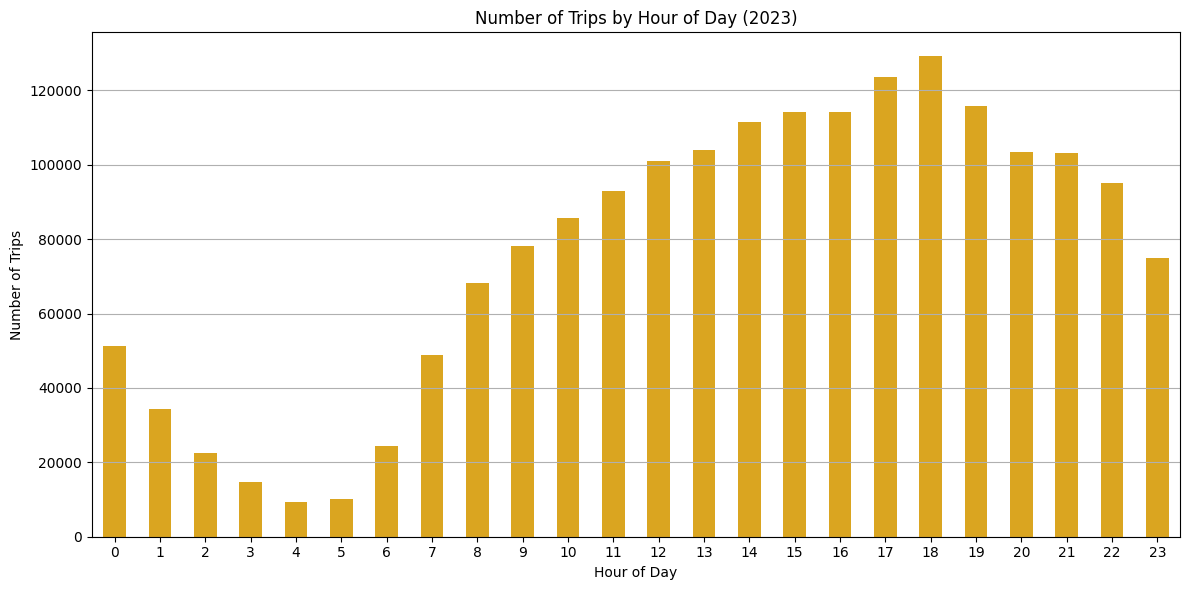

Busiest Hour: 18:00 with 129,161 trips


In [132]:
plt.figure(figsize=(12, 6))
trips_per_hour.plot(kind='bar', color='goldenrod')
plt.title('Number of Trips by Hour of Day (2023)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

busiest_hour = trips_per_hour.idxmax()
busiest_hour_count = trips_per_hour.max()

print(f'Busiest Hour: {busiest_hour}:00 with {busiest_hour_count:,} trips')


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [136]:
#top 5 busiest hours
top_5_hours = trips_per_hour.sort_values(ascending=False).head(5)

# Scale up the number of trips
# While sampling the data we gave taken 5% of the complete data so scaling factor will be 20 (because 20*5=100)
scaling_factor=20
scaled_top_5_hours=top_5_hours * scaling_factor

# Fill in the value of your sampling fraction and use that to scale up the numbers
print("The actual number of trips in the five busiest hours:")
for hour, count in scaled_top_5_hours.items():
    print(f"Hour {hour}:00 — {int(count):,} trips")



The actual number of trips in the five busiest hours:
Hour 18:00 — 2,583,220 trips
Hour 17:00 — 2,470,680 trips
Hour 19:00 — 2,317,620 trips
Hour 15:00 — 2,285,440 trips
Hour 16:00 — 2,285,280 trips


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [145]:
# Compare traffic trends for the week days and weekends
filtered_df_with_zones['day_of_week'] = filtered_df_with_zones['tpep_pickup_datetime'].dt.dayofweek

filtered_df_with_zones['day_type'] = filtered_df_with_zones['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

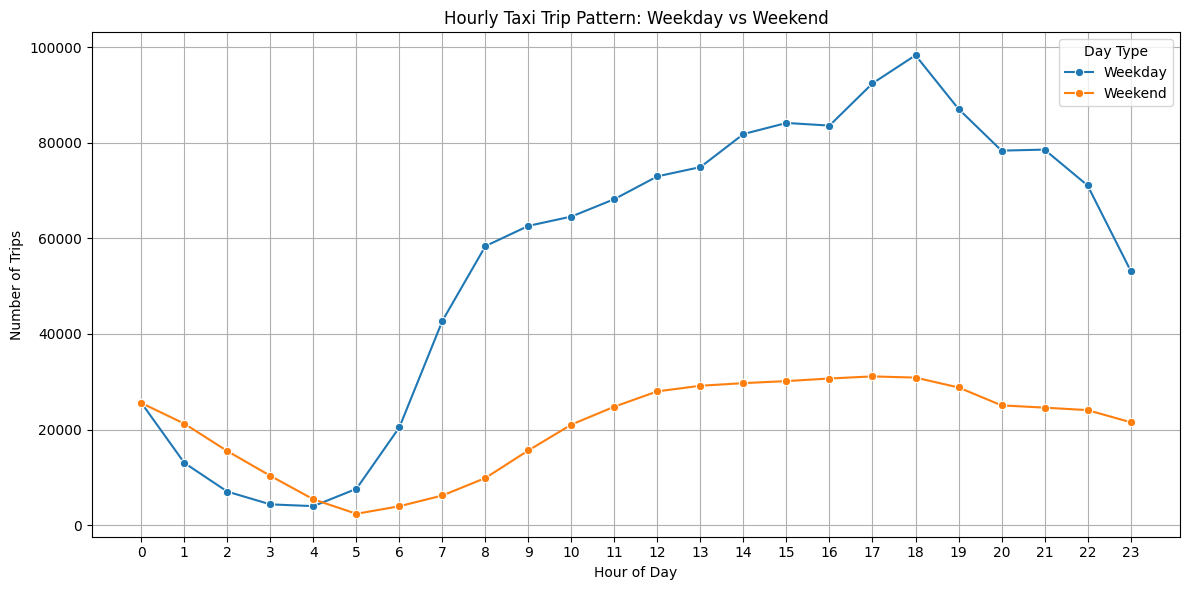

In [146]:
hourly_pattern = (
    filtered_df_with_zones
    .groupby(['pickup_hour', 'day_type'])
    .size()
    .reset_index(name='trip_count')
)

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_pattern, x='pickup_hour', y='trip_count', hue='day_type', marker='o')

plt.title('Hourly Taxi Trip Pattern: Weekday vs Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title='Day Type')
plt.tight_layout()
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?
- hourly traffic is more on weekdays than on weekends
- on weekdays the peack hours are 14:00,15:00,16:00,17:00,18:00,19:00,20:00 during these timings traffic will be more, high demand for taxies and drivers
- On weekends the traffic is less comparitive to weekdays, but during weekwnd we have constant traffic at all hours except from 02:00 to 09:00

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [150]:
pickup_trends = filtered_df_with_zones.groupby(['pickup_hour', 'PULocationID']).size().reset_index(name='pickup_count')

# Find top 10 pickup zones
top_pickup_zones = pickup_trends.groupby('PULocationID')['pickup_count'].sum().sort_values(ascending=False).head(10)

pickup_trends_top_10 = pickup_trends[pickup_trends['PULocationID'].isin(top_pickup_zones.index)]

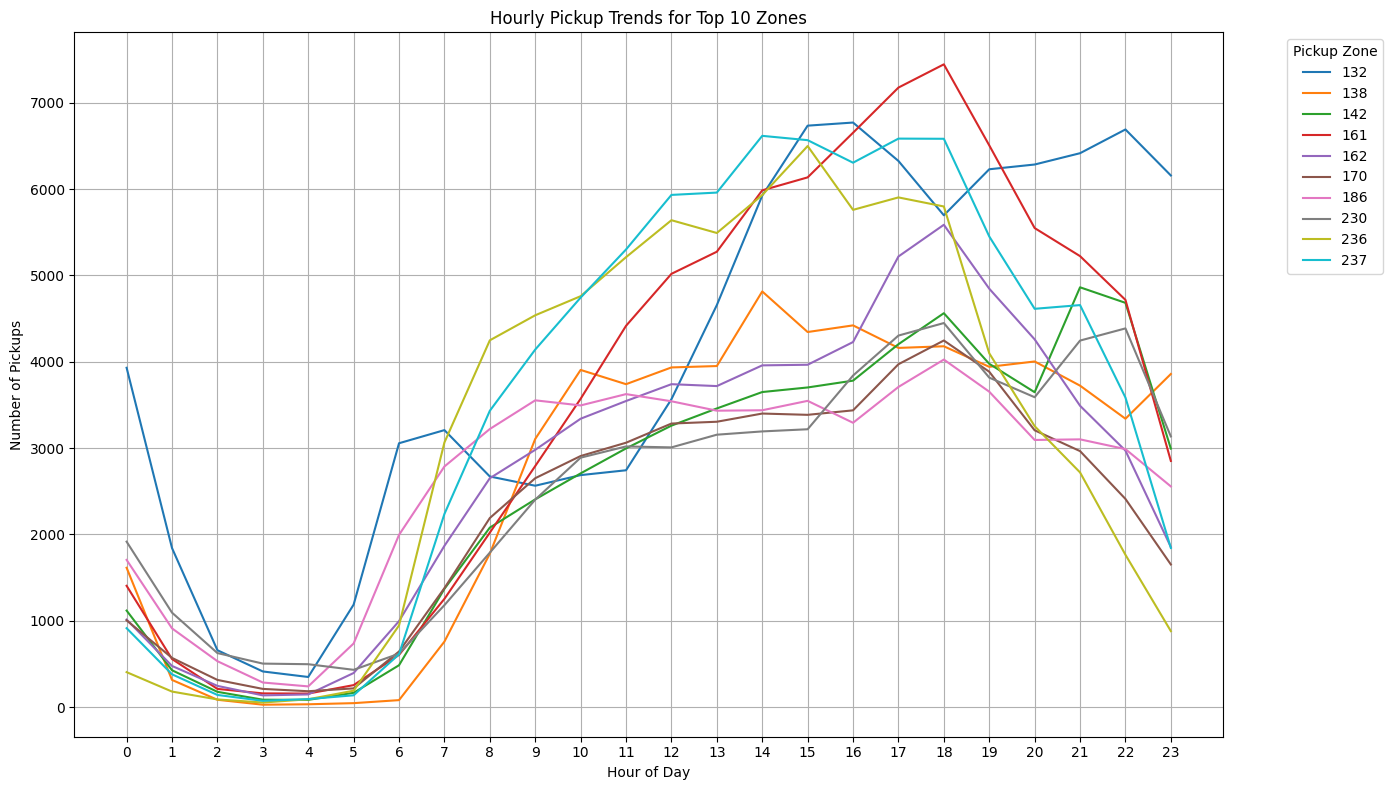

In [151]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=pickup_trends_top_10, x='pickup_hour', y='pickup_count', hue='PULocationID', palette='tab10')
plt.title('Hourly Pickup Trends for Top 10 Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title='Pickup Zone', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [152]:
dropoff_trends = filtered_df_with_zones.groupby(['pickup_hour', 'DOLocationID']).size().reset_index(name='dropoff_count')
#Find top 10 dropoff zones
top_dropoff_zones = dropoff_trends.groupby('DOLocationID')['dropoff_count'].sum().sort_values(ascending=False).head(10)
dropoff_trends_top_10 = dropoff_trends[dropoff_trends['DOLocationID'].isin(top_dropoff_zones.index)]

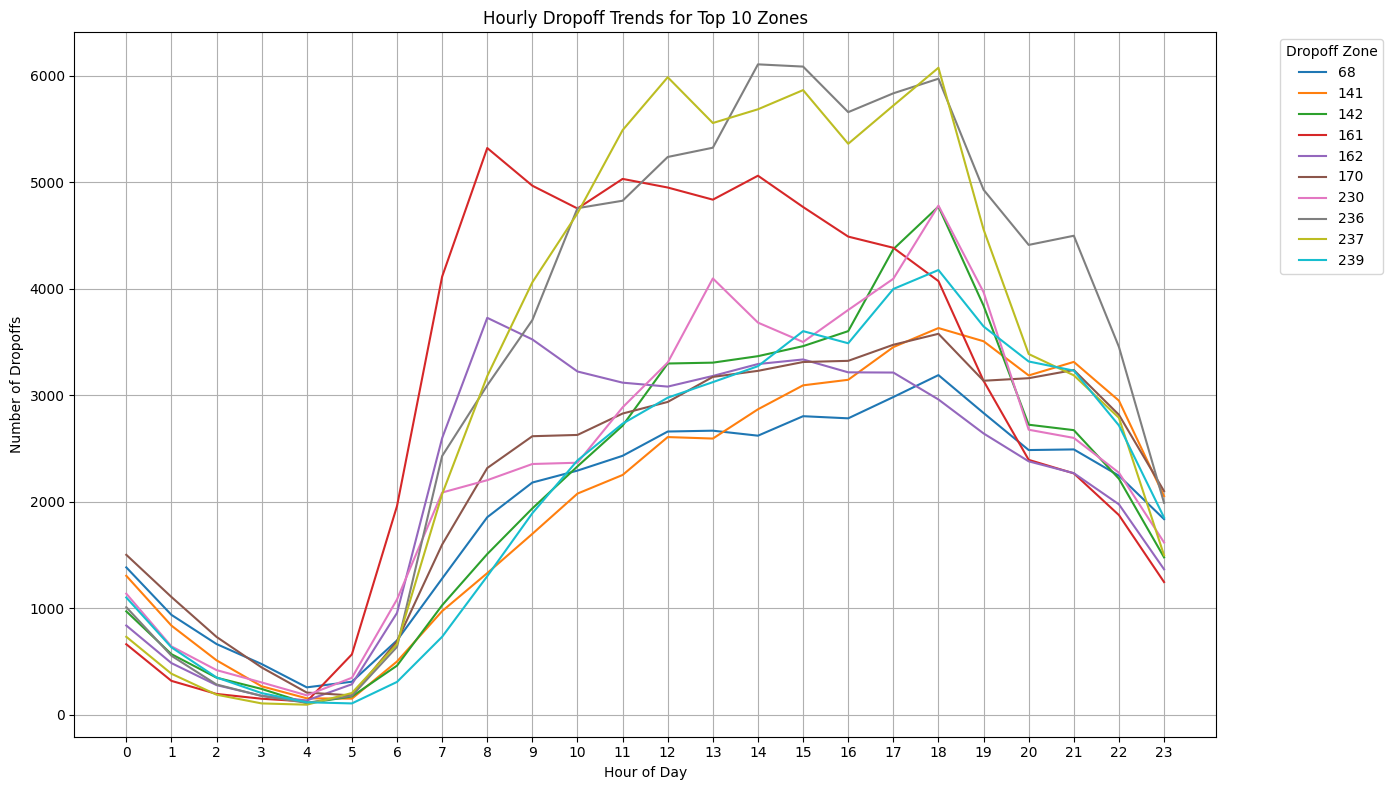

In [153]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=dropoff_trends_top_10, x='pickup_hour', y='dropoff_count', hue='DOLocationID', palette='tab10')
plt.title('Hourly Dropoff Trends for Top 10 Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Dropoffs')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title='Dropoff Zone', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [160]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

pickup_counts = filtered_df_with_zones['PULocationID'].value_counts().rename('pickup_count')
dropoff_counts = filtered_df_with_zones['DOLocationID'].value_counts().rename('dropoff_count')

zone_trip_counts = pd.concat([pickup_counts, dropoff_counts], axis=1).fillna(0)
zone_trip_counts['pickup_dropoff_ratio'] = zone_trip_counts['pickup_count'] / zone_trip_counts['dropoff_count'].replace(0, np.nan)

zone_trip_counts = zone_trip_counts.reset_index().rename(columns={'index': 'LocationID'})
zone_trip_counts = zone_trip_counts.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')

top_ratios = zone_trip_counts.sort_values('pickup_dropoff_ratio', ascending=False).head(10)
bottom_ratios = zone_trip_counts.sort_values('pickup_dropoff_ratio', ascending=True).head(10)


In [161]:
top_ratios

LocationID  pickup_count  dropoff_count  pickup_dropoff_ratio  \
47          70        8342.0          990.0              8.426263   
0          132       96755.0        20915.0              4.626106   
5          138       64156.0        22238.0              2.884972   
6          186       63464.0        40106.0              1.582407   
30         114       24111.0        17536.0              1.374943   
24          43       30748.0        22365.0              1.374827   
18         249       40400.0        30463.0              1.326199   
4          162       65629.0        52244.0              1.256202   
2          161       85930.0        71637.0              1.199520   
26         100       30203.0        25342.0              1.191816   

                            zone  
47                 East Elmhurst  
0                    JFK Airport  
5              LaGuardia Airport  
6   Penn Station/Madison Sq West  
30       Greenwich Village South  
24                  Central Park  
18                  West Village  
4                   Midtown East  
2                 Midtown Center  
26              Garment District

In [162]:
bottom_ratios

LocationID  pickup_count  dropoff_count  pickup_dropoff_ratio  \
261          99           0.0            3.0              0.000000   
259          30           0.0           18.0              0.000000   
258         245           0.0           30.0              0.000000   
260         176           0.0           12.0              0.000000   
256          27           1.0           39.0              0.025641   
255         221           1.0           34.0              0.029412   
206         257          29.0          758.0              0.038259   
97            1         213.0         5316.0              0.040068   
253         115           1.0           23.0              0.043478   
176         198          52.0          990.0              0.052525   

                                    zone  
261                      Freshkills Park  
259                        Broad Channel  
258                        West Brighton  
260                              Oakwood  
256  Breezy Point/Fort Tilden/Riis Beach  
255                            Stapleton  
206                      Windsor Terrace  
97                        Newark Airport  
253                  Grymes Hill/Clifton  
176                            Ridgewood

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [183]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_df = filtered_df_with_zones[(filtered_df_with_zones['pickup_hour'] >= 23) | (filtered_df_with_zones['pickup_hour'] <= 5)]

night_pickups = night_df['PULocationID'].value_counts().rename('night_pickup_count')
night_dropoffs = night_df['DOLocationID'].value_counts().rename('night_dropoff_count')

night_pickups = night_pickups.reset_index().rename(columns={'PULocationID': 'LocationID'})
night_dropoffs = night_dropoffs.reset_index().rename(columns={'DOLocationID': 'LocationID'})

night_pickups = night_pickups.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')
night_dropoffs = night_dropoffs.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')

top10_night_pickups = night_pickups.sort_values('night_pickup_count', ascending=False).head(10)
top10_night_dropoffs = night_dropoffs.sort_values('night_dropoff_count', ascending=False).head(10)

In [186]:
print("Top 10 pickup zones during night hours")
top10_night_pickups

Top 10 pickup zones during night hours


LocationID  night_pickup_count                          zone
0          79               15546                  East Village
1         132               14537                   JFK Airport
2         249               12471                  West Village
3          48               10461                  Clinton East
4         148                9625               Lower East Side
5         114                8749       Greenwich Village South
6         230                8204     Times Sq/Theatre District
7         186                6967  Penn Station/Madison Sq West
8         164                6142                 Midtown South
9          68                6050                  East Chelsea

In [187]:
print("Top 10 dropoff zones during night hours")
top10_night_dropoffs

Top 10 dropoff zones during night hours


LocationID  night_dropoff_count                       zone
0          79                 8310               East Village
1          48                 6871               Clinton East
2         170                 6265                Murray Hill
3          68                 5859               East Chelsea
4         107                 5756                   Gramercy
5         141                 5271            Lenox Hill West
6         263                 4977             Yorkville West
7         249                 4943               West Village
8         230                 4641  Times Sq/Theatre District
9         148                 4381            Lower East Side

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [190]:
# Filter for night hours (11 PM to 5 AM)

night_df = filtered_df_with_zones[
    (filtered_df_with_zones['pickup_hour'] >= 23) | (filtered_df_with_zones['pickup_hour'] <= 5)
]

day_df = filtered_df_with_zones[
    (filtered_df_with_zones['pickup_hour'] >= 6) & (filtered_df_with_zones['pickup_hour'] <= 22)
]

night_revenue = night_df['total_amount'].sum()
day_revenue = day_df['total_amount'].sum()
total_revenue = night_revenue + day_revenue

night_share = night_revenue / total_revenue
day_share = day_revenue / total_revenue

print(f"Nighttime Revenue Share (11PM–5AM): {night_share * 100:.2f}%")
print(f"Daytime Revenue Share (6AM–10PM): {day_share * 100:.2f}%")

Nighttime Revenue Share (11PM–5AM): 12.06%
Daytime Revenue Share (6AM–10PM): 87.94%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [198]:
# Analyse the fare per mile per passenger for different passenger counts

filtered_df_with_zones['fare_per_mile_per_passenger'] = (
    filtered_df_with_zones['fare_amount'] / 
    (filtered_df_with_zones['trip_distance'] * filtered_df_with_zones['passenger_count'])
)

valid_fares_df = filtered_df_with_zones[
    (filtered_df_with_zones['trip_distance'] > 0) & 
    (filtered_df_with_zones['passenger_count'] > 0)
]

avg_fare_per_mile_per_passenger = (
    valid_fares_df.groupby('passenger_count')['fare_per_mile_per_passenger']
    .mean()
    .reset_index()
    .sort_values('passenger_count')
)

print("Average Fare per Mile per Passenger Count:")
print(avg_fare_per_mile_per_passenger)

Average Fare per Mile per Passenger Count:
   passenger_count  fare_per_mile_per_passenger
0              1.0                    10.865045
1              2.0                     6.435722
2              3.0                     3.908048
3              4.0                     4.395563
4              5.0                     1.709571
5              6.0                     1.350748


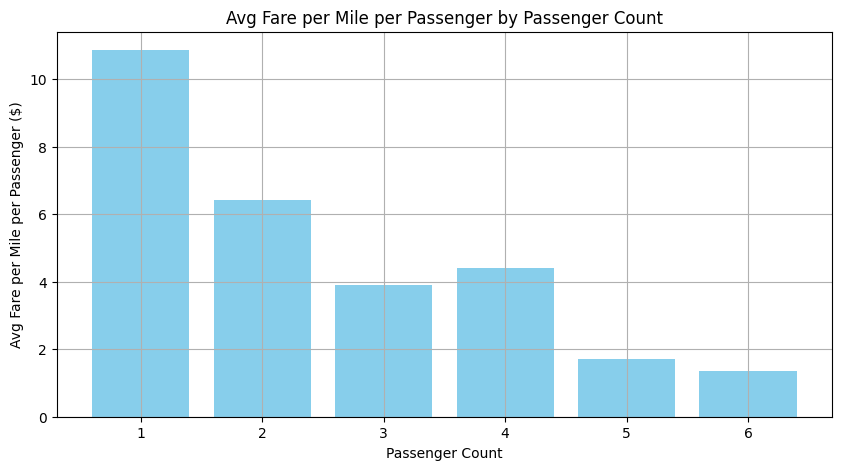

In [199]:
plt.figure(figsize=(10, 5))
plt.bar(avg_fare_per_mile_per_passenger['passenger_count'],
        avg_fare_per_mile_per_passenger['fare_per_mile_per_passenger'],
        color='skyblue')
plt.title('Avg Fare per Mile per Passenger by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Avg Fare per Mile per Passenger ($)')
plt.grid(True)
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [206]:
# Compare the average fare per mile for different days and for different times of the day
# to make sure no divison by zero happens we need to filter the record with trip_distance and fare_amount is greater than 0
valid_df = filtered_df_with_zones[
    (filtered_df_with_zones['trip_distance'] > 0) & 
    (filtered_df_with_zones['fare_amount'] > 0)
]

valid_df['fare_per_mile'] = valid_df['fare_amount'] / valid_df['trip_distance']

avg_fare_per_mile_by_hour = (
    valid_df.groupby('pickup_hour')['fare_per_mile']
    .mean()
    .reset_index()
    .sort_values('pickup_hour')
)

avg_fare_per_mile_by_day = (
    valid_df.groupby('day_of_week')['fare_per_mile']
    .mean()
    .reset_index()
    .sort_values('day_of_week')
)

/var/folders/bp/4740kjgn0d9fmql_4l721c9w0000gn/T/ipykernel_11353/2991656659.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['fare_per_mile'] = valid_df['fare_amount'] / valid_df['trip_distance']


In [207]:
print("Avarage fare per mile by hours of the day")
avg_fare_per_mile_by_hour

Avarage fare per mile by hours of the day


pickup_hour  fare_per_mile
0             0      10.525413
1             1      11.266541
2             2       9.942064
3             3      10.870866
4             4      14.004000
5             5      14.240701
6             6      11.254285
7             7      10.297338
8             8      10.392331
9             9      10.392656
10           10      10.701187
11           11      10.973126
12           12      12.080531
13           13      12.014096
14           14      11.654808
15           15      12.507711
16           16      13.911870
17           17      11.960778
18           18      11.552612
19           19      11.615411
20           20       9.584945
21           21       9.518663
22           22      10.154263
23           23      10.729333

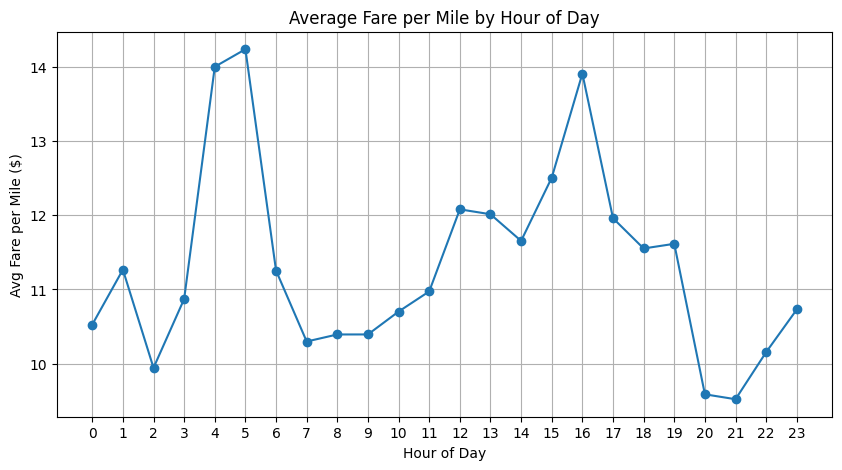

In [208]:
#Visualize 

plt.figure(figsize=(10,5))
plt.plot(avg_fare_per_mile_by_hour['pickup_hour'], avg_fare_per_mile_by_hour['fare_per_mile'], marker='o')
plt.title('Average Fare per Mile by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Avg Fare per Mile ($)')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

In [210]:
print("Avarage fare per mile by days of week")
avg_fare_per_mile_by_day

Avarage fare per mile by days of week


day_of_week  fare_per_mile
0            0      10.992532
1            1      11.395263
2            2      11.113828
3            3      11.276396
4            4      10.905219
5            5      10.926762
6            6      12.550625

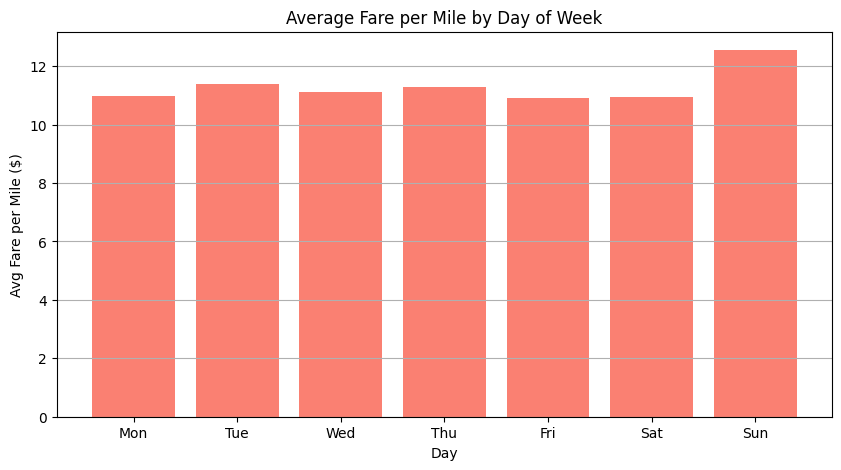

In [212]:
#Visualize
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
avg_fare_per_mile_by_day['day_name'] = avg_fare_per_mile_by_day['day_of_week'].map(dict(zip(range(7), days)))

plt.figure(figsize=(10,5))
plt.bar(avg_fare_per_mile_by_day['day_name'], avg_fare_per_mile_by_day['fare_per_mile'], color='salmon')
plt.title('Average Fare per Mile by Day of Week')
plt.xlabel('Day')
plt.ylabel('Avg Fare per Mile ($)')
plt.grid(axis='y')
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [222]:
# Compare fare per mile for different vendors for different hours of the day
vendor_hour_fare = (
    valid_df.groupby(['VendorID', 'pickup_hour'])['fare_per_mile']
    .mean()
    .reset_index()
    .sort_values(['VendorID', 'pickup_hour'])
)

print("Avarage fare per mile by Vender ID at differnt hours of the day")
vendor_hour_fare


Avarage fare per mile by Vender ID at differnt hours of the day


VendorID  pickup_hour  fare_per_mile
0          1            0       6.799816
1          1            1       7.059818
2          1            2       6.932474
3          1            3       6.516771
4          1            4       7.510611
5          1            5       6.997201
6          1            6       6.659932
7          1            7       7.195271
8          1            8       8.076507
9          1            9       8.404275
10         1           10       8.427937
11         1           11       8.726349
12         1           12       8.842403
13         1           13       8.741848
14         1           14       8.657642
15         1           15       8.821047
16         1           16       8.840188
17         1           17       8.651776
18         1           18       8.465146
19         1           19       7.925380
20         1           20       7.472126
21         1           21       7.316143
22         1           22       7.017324
23         1           23       6.904918
24         2            0      11.619210
25         2            1      12.504809
26         2            2      10.860048
27         2            3      12.174773
28         2            4      16.178642
29         2            5      17.240482
30         2            6      13.249234
31         2            7      11.574026
32         2            8      11.318420
33         2            9      11.181021
34         2           10      11.595854
35         2           11      11.843551
36         2           12      13.314605
37         2           13      13.281072
38         2           14      12.789024
39         2           15      13.886977
40         2           16      15.798529
41         2           17      13.143865
42         2           18      12.622616
43         2           19      12.848366
44         2           20      10.268710
45         2           21      10.194508
46         2           22      11.088353
47         2           23      11.887438

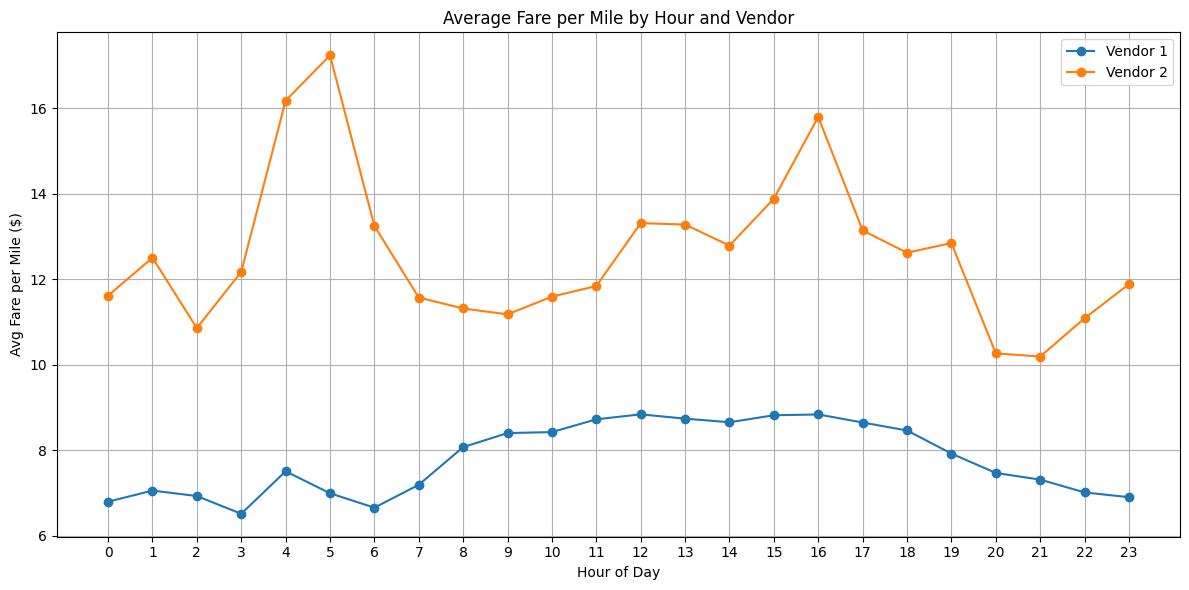

In [224]:
plt.figure(figsize=(12, 6))

for vendor in vendor_hour_fare['VendorID'].unique():
    vendor_data = vendor_hour_fare[vendor_hour_fare['VendorID'] == vendor]
    plt.plot(vendor_data['pickup_hour'], vendor_data['fare_per_mile'], marker='o', label=f'Vendor {vendor}')

plt.title('Average Fare per Mile by Hour and Vendor')
plt.xlabel('Hour of Day')
plt.ylabel('Avg Fare per Mile ($)')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [227]:
# Defining distance tiers

def distance_tiers(d):
    if d <= 2:
        return 'Short (≤2 mi)'
    elif 2 < d <= 5:
        return 'Medium (2–5 mi)'
    else:
        return 'Long (>5 mi)'

valid_df['distance_tier'] = valid_df['trip_distance'].apply(distance_tiers)

tiered_fare_analysis = (
    valid_df.groupby(['VendorID', 'distance_tier'])['fare_per_mile']
    .mean()
    .reset_index()
    .sort_values(['distance_tier', 'VendorID'])
)

/var/folders/bp/4740kjgn0d9fmql_4l721c9w0000gn/T/ipykernel_11353/527724797.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['distance_tier'] = valid_df['trip_distance'].apply(distance_tiers)


In [231]:
print("The fare rates of the different vendors in a distance_tiered fashion")
tiered_fare_analysis

The fare rates of the different vendors in a distance_tiered fashion


VendorID    distance_tier  fare_per_mile
0         1     Long (>5 mi)       4.424902
3         2     Long (>5 mi)       4.503000
1         1  Medium (2–5 mi)       6.381335
4         2  Medium (2–5 mi)       6.549270
2         1    Short (≤2 mi)       9.930695
5         2    Short (≤2 mi)      17.938666

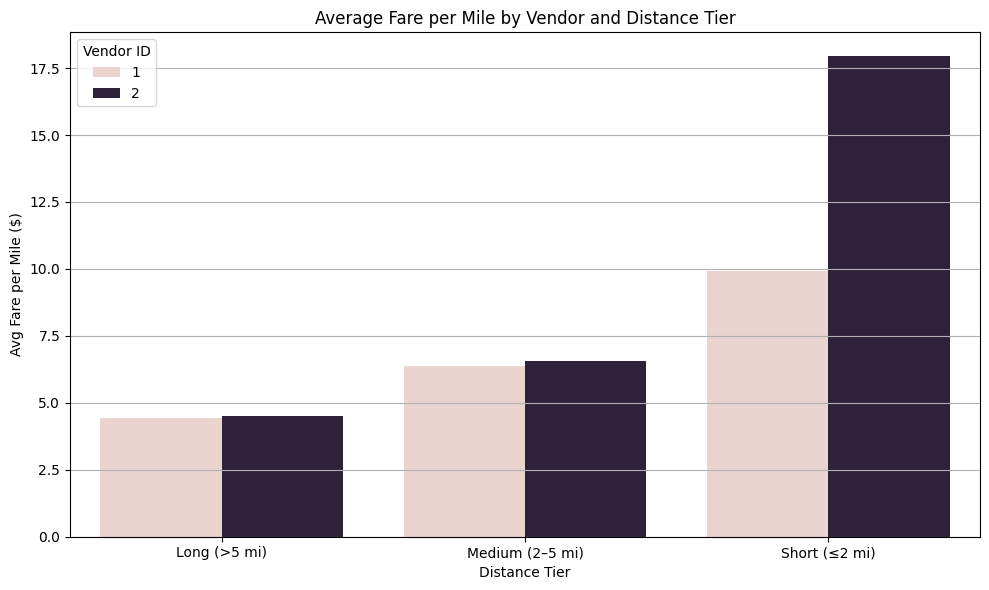

In [229]:
plt.figure(figsize=(10, 6))
sns.barplot(data=tiered_fare_analysis, x='distance_tier', y='fare_per_mile', hue='VendorID')
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Avg Fare per Mile ($)')
plt.legend(title='Vendor ID')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [241]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
# As we know that the tip amount is populated only for the payments made through credit cards
card_tips_df = filtered_df_with_zones[
    (filtered_df_with_zones['payment_type'] == 1) &  # Credit card only
    (filtered_df_with_zones['total_amount'] > 0) & 
    (filtered_df_with_zones['tip_amount'] >= 0)
].copy()

card_tips_df['tip_pct'] = card_tips_df['tip_amount'] / card_tips_df['total_amount'] * 100

In [242]:
#tip percentages based on trip distances
bins = [0, 1, 2, 5, 10, 20, float('inf')]
labels = ['<1 mi', '1–2 mi', '2–5 mi', '5–10 mi', '10–20 mi', '>20 mi']
card_tips_df['distance_bin'] = pd.cut(card_tips_df['trip_distance'], bins=bins, labels=labels)
tip_by_distance = card_tips_df.groupby('distance_bin')['tip_pct'].mean().reset_index()

tip_by_distance

/var/folders/bp/4740kjgn0d9fmql_4l721c9w0000gn/T/ipykernel_11353/80004466.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tip_by_distance = card_tips_df.groupby('distance_bin')['tip_pct'].mean().reset_index()


distance_bin    tip_pct
0        <1 mi  15.227715
1       1–2 mi  14.909633
2       2–5 mi  14.559168
3      5–10 mi  14.104446
4     10–20 mi  13.895738
5       >20 mi  13.195291

/var/folders/bp/4740kjgn0d9fmql_4l721c9w0000gn/T/ipykernel_11353/4158976538.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='distance_bin', y='tip_pct', data=tip_by_distance, palette='Blues_d')


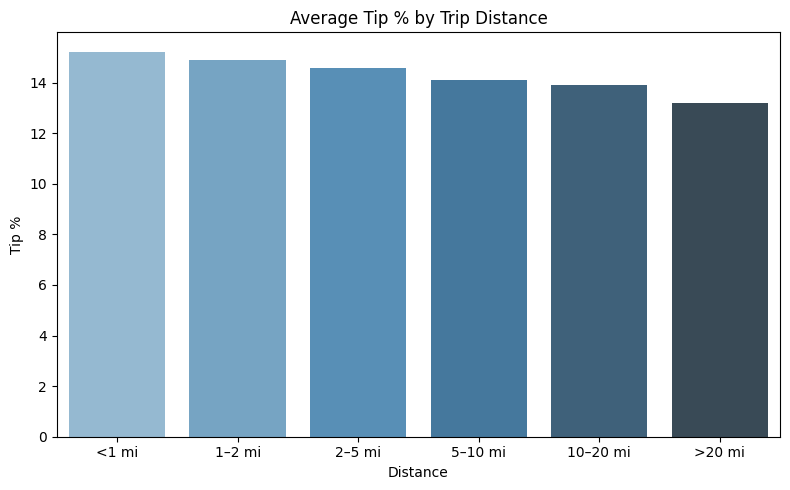

In [245]:
plt.figure(figsize=(8, 5))
sns.barplot(x='distance_bin', y='tip_pct', data=tip_by_distance, palette='Blues_d')
plt.title('Average Tip % by Trip Distance')
plt.xlabel('Distance')
plt.ylabel('Tip %')
plt.tight_layout()
plt.show()

In [243]:
#tip percentages based on passenger_count
tip_by_passenger = card_tips_df.groupby('passenger_count')['tip_pct'].mean().reset_index()
tip_by_passenger

passenger_count    tip_pct
0              1.0  14.683668
1              2.0  14.739026
2              3.0  14.575236
3              4.0  14.500356
4              5.0  14.863852
5              6.0  14.915992

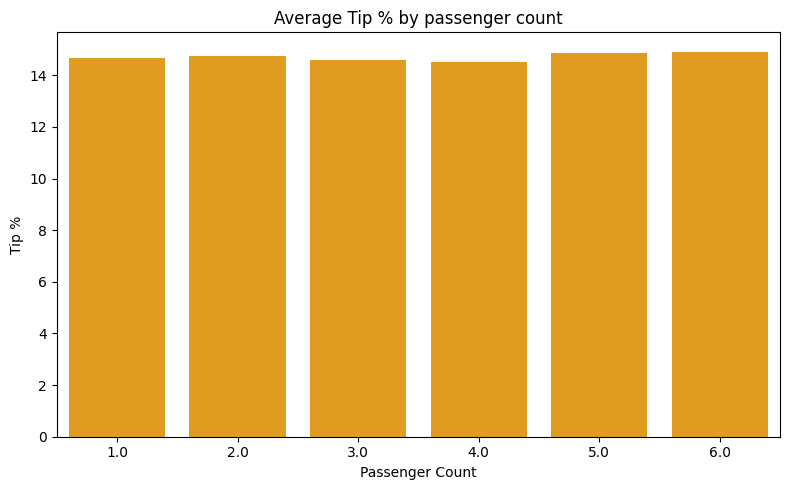

In [247]:
plt.figure(figsize=(8, 5))
sns.barplot(x='passenger_count', y='tip_pct', data=tip_by_passenger, color='orange')
plt.title('Average Tip % by passenger count')
plt.xlabel('Passenger Count')
plt.ylabel('Tip %')
plt.tight_layout()
plt.show()

In [244]:
#tip percentages based on time of pickup
tip_by_hour = card_tips_df.groupby('pickup_hour')['tip_pct'].mean().reset_index()
tip_by_hour

pickup_hour    tip_pct
0             0  14.262821
1             1  14.121372
2             2  13.906990
3             3  13.750408
4             4  13.494938
5             5  13.334782
6             6  13.818099
7             7  14.310985
8             8  14.557364
9             9  14.792058
10           10  14.909757
11           11  14.943188
12           12  14.930265
13           13  14.967155
14           14  14.935395
15           15  14.849609
16           16  14.665938
17           17  14.662186
18           18  14.703108
19           19  14.590304
20           20  14.786663
21           21  14.862626
22           22  14.746108
23           23  14.470888

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

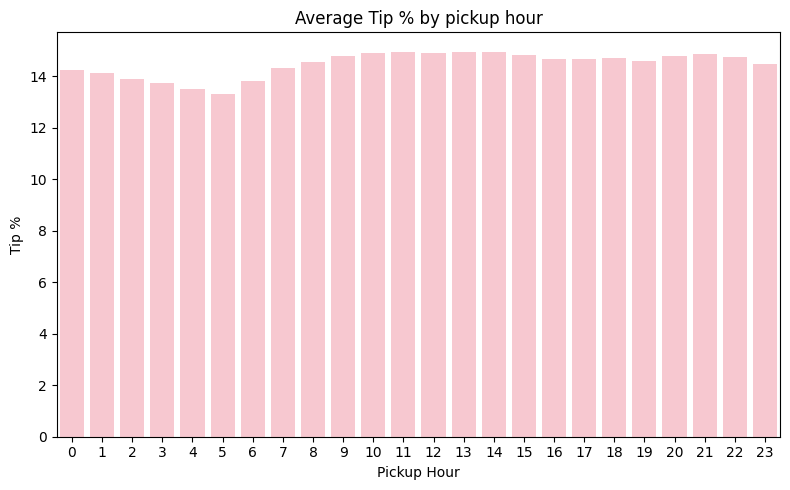

In [250]:
plt.figure(figsize=(8, 5))
sns.barplot(x='pickup_hour', y='tip_pct', data=tip_by_hour, color='pink')
plt.title('Average Tip % by pickup hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Tip %')
plt.tight_layout()
plt.show()

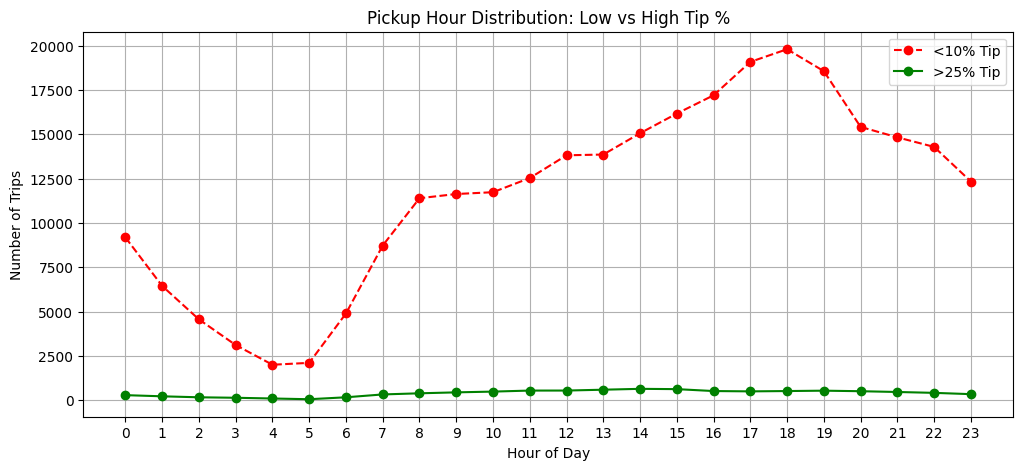

In [261]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
low_tip_df = card_tips_df[card_tips_df['tip_pct'] < 10]
high_tip_df = card_tips_df[card_tips_df['tip_pct'] > 25]

low_tip_hours = low_tip_df['tpep_pickup_datetime'].dt.hour.value_counts().sort_index()
high_tip_hours = high_tip_df['tpep_pickup_datetime'].dt.hour.value_counts().sort_index()

plt.figure(figsize=(12, 5))
plt.plot(low_tip_hours.index, low_tip_hours.values, label='<10% Tip', marker='o', linestyle='--', color='red')
plt.plot(high_tip_hours.index, high_tip_hours.values, label='>25% Tip', marker='o', color='green')
plt.title('Pickup Hour Distribution: Low vs High Tip %')
plt.xlabel('Hour of Day')
plt.xticks(range(0, 24))
plt.ylabel('Number of Trips')
plt.legend()
plt.grid(True)
plt.show()


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

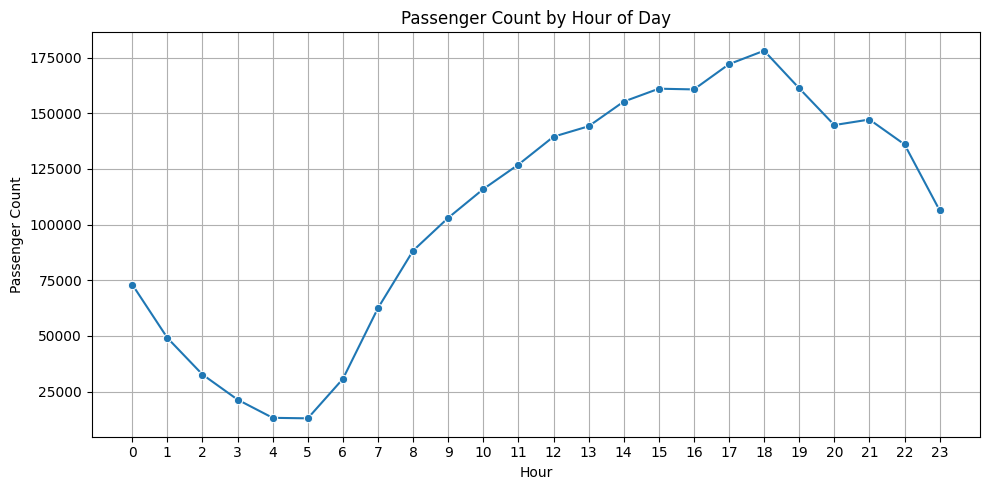

In [265]:
# See how passenger count varies across hours and days
hourly_passengers = filtered_df_with_zones.groupby('pickup_hour')['passenger_count'].sum().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_passengers, x='pickup_hour', y='passenger_count', marker='o')
plt.title('Passenger Count by Hour of Day')
plt.xlabel('Hour')
plt.xticks(range(0, 24))
plt.ylabel('Passenger Count')
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/bp/4740kjgn0d9fmql_4l721c9w0000gn/T/ipykernel_11353/320332117.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_of_week_passengers, x='day', y='passenger_count', palette='viridis')


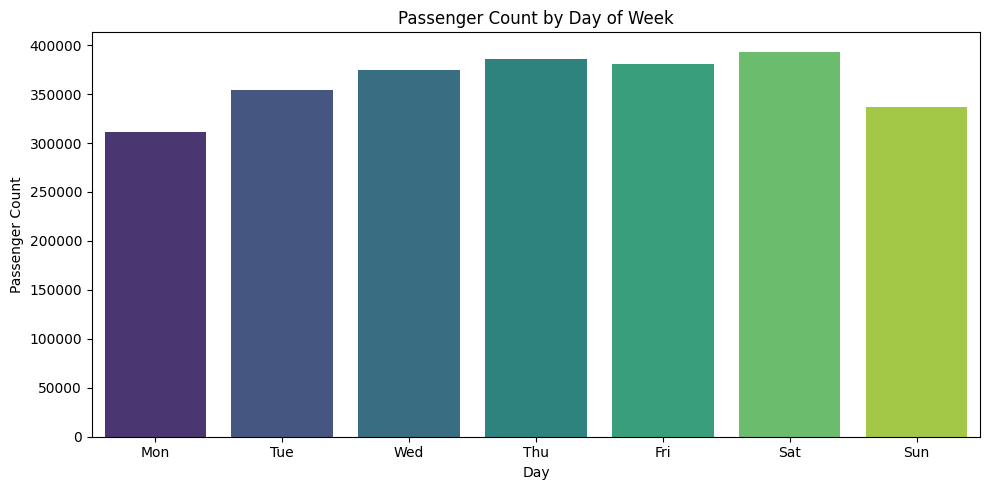

In [266]:
day_of_week_passengers = filtered_df_with_zones.groupby('day_of_week')['passenger_count'].sum().reset_index()
day_of_week_passengers['day'] = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(10, 5))
sns.barplot(data=day_of_week_passengers, x='day', y='passenger_count', palette='viridis')
plt.title('Passenger Count by Day of Week')
plt.xlabel('Day')
plt.ylabel('Passenger Count')
plt.tight_layout()
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [281]:
# How does passenger count vary across zones
filtered_df_with_zones.columns


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'pickup_hour',
       'pickup_day', 'pickup_month', 'quarter', 'trip_duration', 'OBJECTID',
       'Shape_Leng', 'Shape_Area', 'pickup_zone', 'pickup_borough', 'geometry',
       'speed', 'day_of_week', 'day_type', 'fare_per_mile_per_passenger'],
      dtype='object')

In [282]:
zone_passenger_stats = (
    filtered_df_with_zones.groupby('pickup_zone')['passenger_count']
    .agg(['sum', 'count'])
    .reset_index()
    .rename(columns={'sum': 'passenger_count', 'count': 'num_trips'})
    .sort_values('passenger_count', ascending=False)
)

In [283]:
zone_passenger_stats.head(10)

pickup_zone  passenger_count  num_trips
119                   JFK Airport         145077.0      96755
152                Midtown Center         119587.0      85930
228         Upper East Side South         116569.0      86895
227         Upper East Side North         104181.0      77507
221     Times Sq/Theatre District          91619.0      61305
153                  Midtown East          87631.0      65629
129             LaGuardia Airport          87581.0      64156
177  Penn Station/Madison Sq West          85708.0      63464
133           Lincoln Square East          84420.0      60878
154                 Midtown North          75155.0      53746

/var/folders/bp/4740kjgn0d9fmql_4l721c9w0000gn/T/ipykernel_11353/2521708970.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_zones, x='passenger_count', y='pickup_zone', palette='mako')


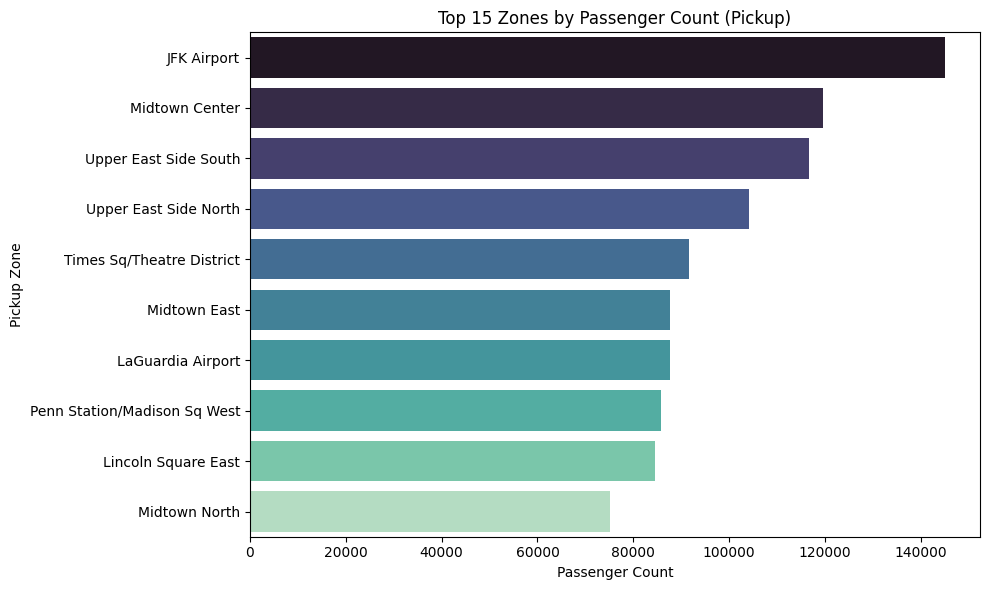

In [284]:

top_zones = zone_passenger_stats.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_zones, x='passenger_count', y='pickup_zone', palette='mako')
plt.title('Top 15 Zones by Passenger Count (Pickup)')
plt.xlabel('Passenger Count')
plt.ylabel('Pickup Zone')
plt.tight_layout()
plt.show()

In [287]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
zone_passenger_stats = (
    filtered_df_with_zones.groupby('pickup_zone')['passenger_count']
    .agg(['mean','sum' ,'count'])
    .reset_index()
    .rename(columns={'mean': 'avg_passenger_count','sum':'passanger_count', 'count': 'num_trips'})
)
zone_passenger_stats

pickup_zone  avg_passenger_count  passanger_count  num_trips
0    Allerton/Pelham Gardens             1.025000             41.0         40
1              Alphabet City             1.430414           2662.0       1861
2              Arden Heights             1.000000             13.0         13
3    Arrochar/Fort Wadsworth             1.875000             45.0         24
4                    Astoria             1.280047           1097.0        857
..                       ...                  ...              ...        ...
249       Woodlawn/Wakefield             1.106383             52.0         47
250                 Woodside             1.302521            465.0        357
251       World Trade Center             1.545814          14846.0       9604
252           Yorkville East             1.329057          31387.0      23616
253           Yorkville West             1.337626          46639.0      34867

[254 rows x 4 columns]

Find out how often surcharges/extra charges are applied to understand their prevalance

In [289]:
filtered_df_with_zones.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'pickup_hour',
       'pickup_day', 'pickup_month', 'quarter', 'trip_duration', 'OBJECTID',
       'Shape_Leng', 'Shape_Area', 'pickup_zone', 'pickup_borough', 'geometry',
       'speed', 'day_of_week', 'day_type', 'fare_per_mile_per_passenger'],
      dtype='object')

In [ ]:
filtered_df_with_zones = filtered_df_with_zones.merge(zones[['LocationID', 'zone']], 
                                                      left_on='DOLocationID', 
                                                      right_on='LocationID', 
                                                      how='left')

# Rename the 'zone' column to 'dropoff_zone'
filtered_df_with_zones = filtered_df_with_zones.rename(columns={'zone': 'dropoff_zone'})

# Drop the extra 'LocationID' column
filtered_df_with_zones = filtered_df_with_zones.drop('LocationID', axis=1)

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [297]:
# How often is each surcharge applied?

extra_charges_df = filtered_df_with_zones[
    (filtered_df_with_zones['extra'] > 0) |
    (filtered_df_with_zones['congestion_surcharge'] > 0) |
    (filtered_df_with_zones['improvement_surcharge'] > 0) |
    (filtered_df_with_zones['tolls_amount'] > 0) |
    (filtered_df_with_zones['airport_fee'] > 0) |
    (filtered_df_with_zones['mta_tax'] > 0)
].copy()

#pickup zones with extra charges
pickup_extra_counts = extra_charges_df['pickup_zone'].value_counts().reset_index()
pickup_extra_counts.columns = ['pickup_zone', 'num_extra_charges']

#dropoff zones with extra charges
dropoff_extra_counts = extra_charges_df['dropoff_zone'].value_counts().reset_index()
dropoff_extra_counts.columns = ['dropoff_zone', 'num_extra_charges']


/var/folders/bp/4740kjgn0d9fmql_4l721c9w0000gn/T/ipykernel_11353/3794421651.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pickup_extra_counts.head(10), x='num_extra_charges', y='pickup_zone', palette='Blues_d')


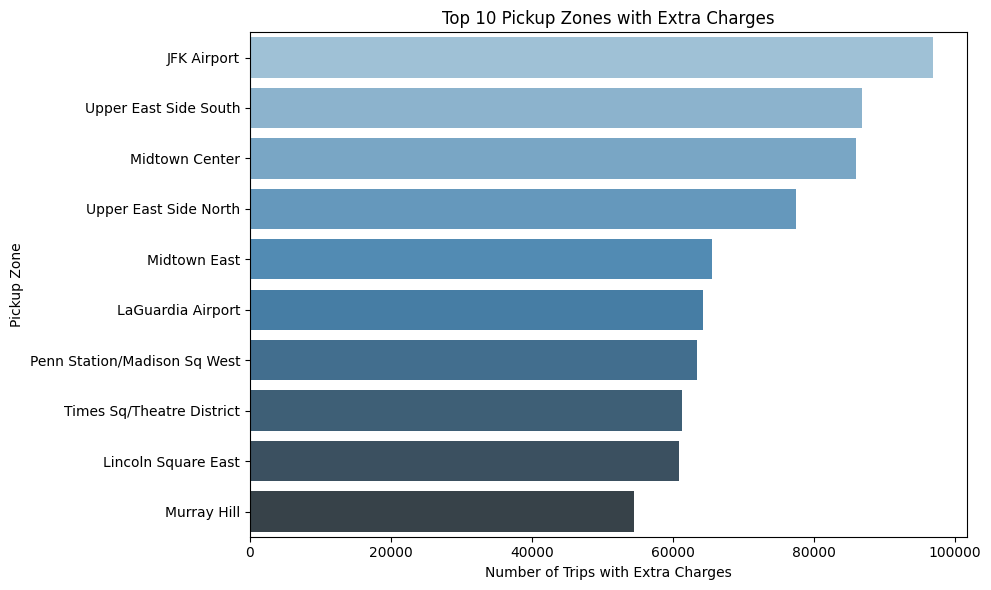

In [ ]:
#pickup zones with extra charges
plt.figure(figsize=(10,6))
sns.barplot(data=pickup_extra_counts.head(10), x='num_extra_charges', y='pickup_zone', palette='Blues_d')
plt.title("Top 10 Pickup Zones with Extra Charges")
plt.xlabel("Number of Trips with Extra Charges")
plt.ylabel("Pickup Zone")
plt.tight_layout()
plt.show()

/var/folders/bp/4740kjgn0d9fmql_4l721c9w0000gn/T/ipykernel_11353/871959111.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dropoff_extra_counts.head(10), x='num_extra_charges', y='dropoff_zone', palette='Purples_d')


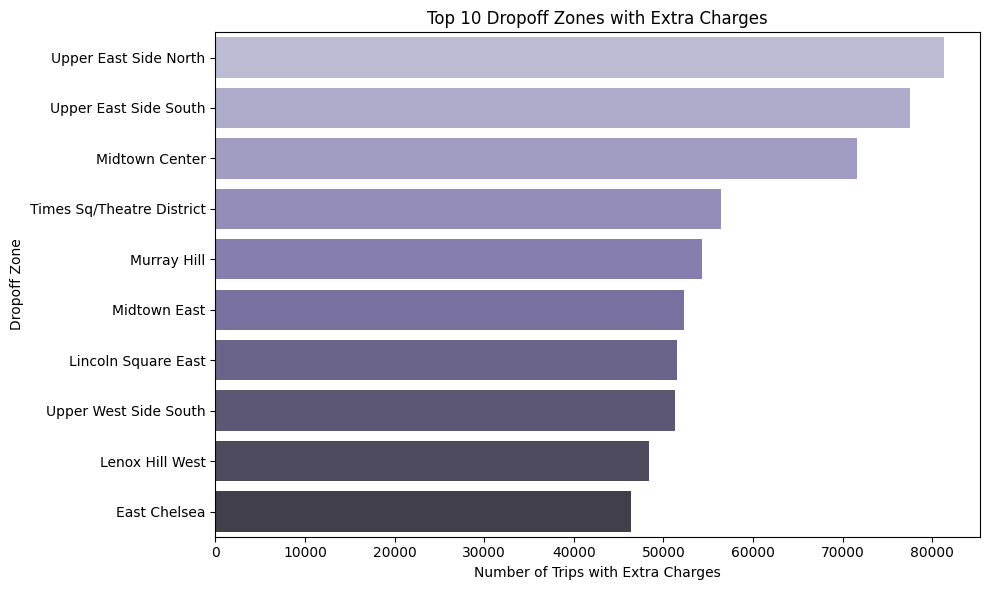

In [ ]:
#dropoff zones with extra charges
plt.figure(figsize=(10,6))
sns.barplot(data=dropoff_extra_counts.head(10), x='num_extra_charges', y='dropoff_zone', palette='Purples_d')
plt.title("Top 10 Dropoff Zones with Extra Charges")
plt.xlabel("Number of Trips with Extra Charges")
plt.ylabel("Dropoff Zone")
plt.tight_layout()
plt.show()

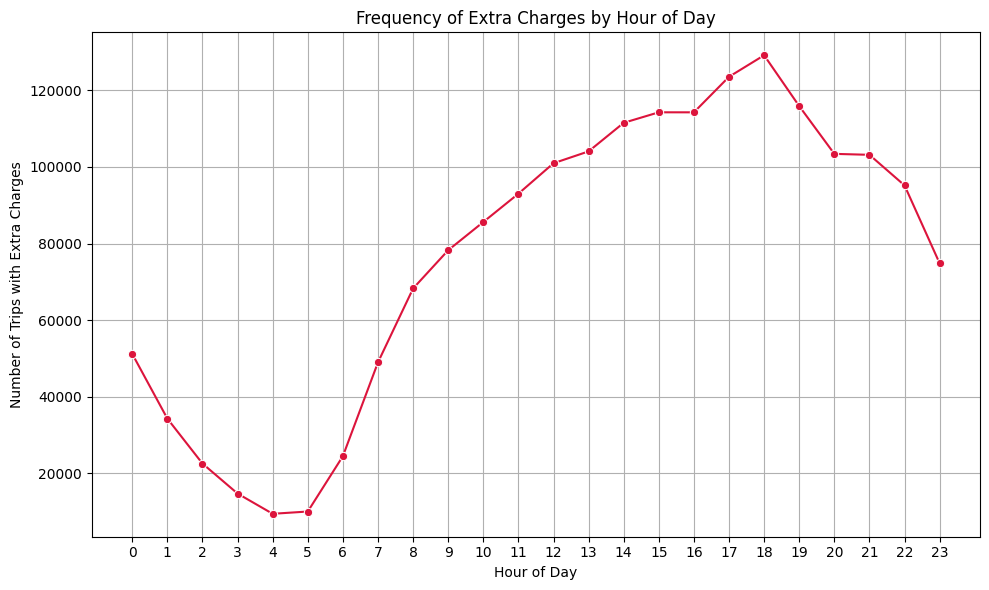

In [303]:
#Extra Charges by Hour of Day
extra_charges_df['pickup_hour'] = extra_charges_df['tpep_pickup_datetime'].dt.hour

hourly_extra = extra_charges_df.groupby('pickup_hour').size().reset_index(name='num_extra_charges')

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(data=hourly_extra, x='pickup_hour', y='num_extra_charges', marker='o', color='crimson')
plt.title("Frequency of Extra Charges by Hour of Day")
plt.xlabel("Hour of Day")
plt.xticks(range(0, 24))
plt.ylabel("Number of Trips with Extra Charges")
plt.grid(True)
plt.tight_layout()
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

##### Increase Taxi Availability During Peak Times
- From the data, we know which hours are the busiest. By sending more taxis to high-demand areas before these hours begin, the system can meet passenger needs more effectively and reduce wait times.
##### Avoid Routes That Slow Down Travel
- Certain streets and routes consistently have lower travel speeds. These should be avoided during heavy traffic times. Guiding drivers to take alternate routes can help cut travel time and fuel costs.
##### Focus on High-Demand Pickup and Dropoff Areas
- The top pickup and dropoff zones should be used to guide where empty taxis are sent. This increases the chances of finding a new passenger quickly, reducing idle time.
##### Improve Nighttime Taxi Coverage
- Data shows specific areas are more active late at night. Between 11 PM and 5 AM, it’s important to have enough taxis around nightspots and busy residential zones to meet demand.
##### Balance Areas with Too Many Dropoffs or Pickups
-Some neighborhoods have many dropoffs but few pickups, or vice versa. Drivers can be directed to areas where there’s a better balance, so they’re more likely to get their next ride quickly.
##### Change Dispatch Plans Based on the Day
- Weekdays and weekends show different travel patterns. On weekdays, taxis should be concentrated around business districts and transport hubs. On weekends, nightlife and shopping areas should get more attention.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

##### Time-of-Day-Based Positioning
  - Trip data shows demand spikes during 12:00 PM to 22:00 place more resources (taxis and drivers)
      
##### Day-of-Week Adjustments
- Weekdays:
  During weekday number of pickups and dropoff (numner of trips) are more as these are working days. Focus on work-related areas—financial districts, business centers, transit hubs—especially during rush hours.
- Weekends:
 During weekends number of trips are less than the weekdays. And the pickup and dropoff zones are not related to work.Redirect more cabs to leisure-focused zones such as parks, shopping centers, restaurants, and nightlife districts.
##### Cover Imbalanced Zones
- Identify zones with high dropoff but low pickup ratios. Move idle taxis to these underserved areas to reduce wait times and make the most of underused demand.
		Top zones with high traffic during night
- By finding the top zones with high traffic during the night time, Vendor can increase the taxis at these zones.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

##### Peak Hour Fare Adjustments
 - Trip data shows demand spikes during morning (8–10 AM) and evening (5–7 PM) commute times. Slightly increasing fares during these hours can help balance supply and demand, while also boosting revenue for drivers.
##### Zone-Specific Pricing
- High-demand areas like Midtown Manhattan and JFK Airport consistently attract large numbers of trips. Applying a small surcharge in these zones makes use of strong demand. On the other hand, offering small fare reductions in low-demand areas may help attract more riders and improve coverage.
##### Discounts During Off-Peak Hours
- During low-demand times (like 2–6 AM or mid-day hours), offer temporary discounts or special pricing. This encourages more people to ride when taxis are usually underutilized and keeps the fleet moving.
##### Flat Rates for Frequent Routes
- Use fixed pricing for common routes such as JFK to Manhattan or Times Square to Central Park. Flat rates offer predictability to customers and can be optimized using historical average fare data for those trips.
##### Adjust Pricing in Traffic-Prone Areas
- For zones and times where trips tend to move slowly due to congestion (as identified in the data), consider slightly raising the per-minute fare to account for idle time, rather than relying only on distance-based pricing.
##### Higher Fares on Weekend Nights
- Trips increase significantly on weekend nights in nightlife areas. Modestly increasing fares during these high-demand late-night periods (especially on Fridays and Saturdays) can improve driver income and reduce wait times for passengers.